<img style="float: left; padding-right: 0px; width: 145px" src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e9/EPF_logo_2021.png/524px-EPF_logo_2021.png"> 
<br><br>


###  <div style="text-align: right">  Data Engineering - P2024 <br> <br>  <time datetime="2023-03-07">2023/04/04</time> <br> <br> <u>Name </u>: RAPADAMNABA Robert </div>
<br> 



#   <center>  Algebra and Analysis for Machine Learning </center>

#  <center><u>  Laboratory 2 - Matrix decomposition</u></center>

In this Lab, we will review some major concepts of linear algebra. We will start with **Cholesky decomposition** for symmetric, positive definite
matrices. Then we will move to the **eigendecomposition** for diagonalizable matrices: We will develop on the idea that a matrix can be seen as a **linear transformation** and that applying a matrix on its eigenvectors gives new vectors that have the same direction.   As a bonus, we will also see how to visualize these linear transformations in Python. We will conclude with the most known and widely used matrix decomposition method : the **Singular-Value Decomposition**, or SVD. All matrices have an SVD, which makes it more stable than other methods, such as the eigendecomposition. As such, it is often used in a wide array of applications including compressing, denoising, and data reduction.

After completing this lab, you will be able to know:

    - How to compute Cholesky decomposition in python

    - How to compute eigendecomposition in python

    - What Singular-value decomposition is and what is involved

    - How to calculate a SVD and reconstruct a rectangular and square matrix from SVD elements.


    - How to calculate the pseudoinverse and perform dimensionality reduction using the SVD.


Let’s get started.

# I. Cholesky decomposition for SDP matrices

## 1. Exercise 1: Calculating Cholesky Decomposition in Python

In this exercise, we are going to learn how to calculate Cholesky decomposition in practice. 


As a reminder, Cholesky decompostion factors a symmetric definite positive matrix into a lower triangular matrix L and its transpose such that

$$
A = LL^T.
$$

For example,
$$
\underbrace{
    \begin{pmatrix}
    4.31  &  0.094 & 1.599 & 0.634 & -0.16 \\
    0.094 &  6.961 & 1.984 &  3.656 & -3.814 \\
    1.599 &  1.984 & 7.412 & -1.473 & -2.258 \\
    0.634 &  3.656 & -1.473 &  4.386 & -1.518 \\
    0.16  & -3.814 & -2.258 & -1.518 &  2.553
\end{pmatrix}
}_{\bf A}
$$
decomposes into the product of
$$
\underbrace{
    \begin{pmatrix}
        2.076 & 0 &    0  &   0  &   0 \\
        0.045 &  2.638  0 &    0 &   0 \\
        0.77  &  0.739 & 2.505 & 0 &   0 \\
        0.305 &  1.381 &-1.089 & 1.095 & 0 \\
        -0.077 &  -1.445 & -0.452 &  0.007 & 0.506
        \end{pmatrix}
}_{\bf L}
$$
and
$$
\underbrace{
    \begin{pmatrix}
    2.076 & 0.045 & 0.77 &  0.305 & -0.077 \\
    0 &    2.638 & 0.739 &  1.381 & -1.445 \\
    0 &    0 &    2.505 &  -1.089 & -0.452 \\
    0 &    0 &    0  &   1.095 & 0.007 \\
    0 &    0 &    0  &   0  &   0.506
    \end{pmatrix}
}_{\bf L^T}
$$





Let us start by creating a common data set to test different cholesky decomposition methods in python. Then, we go through matrix factorization using NumPy and SciPy. After that we will try to implement **Cholesky–Banachiewicz algorithm** in Python to calculate the decomposition. 

Finally, we will see an example of Cholesky Decomposition use for correlated parameters (used in Finance). More precisely, we will explore how we can use this to generate correlated random variables.  This has applications in finance where one might  wish to do a Monte Carlo simulation on two or more correlated stocks. 

The data we will use here is the matrix *A_test* you will create below. It is a 5x5 test matrix.  We will use the same data for all cholesky methods. This makes it easy to compare the results and check that everything goes as planned.

 - Setting `numpy.random.seed()` to 0 and using `numpy.random.rand()`, create a 5x5 matrix called *A_test*

 - Make *A_test* **symmetric**.

 - Make it **positive definite** by making diagonals dominant (for e.g., by multiplying the diagonal elements by 10) 

 - Using `numpy.printoptions()`,  print the matrix *A_test* with exactly 4 decimal places (i.e. 3 digits after the decimal point).


In [2]:
#importing the necessary library 
import numpy as np




Our test matrix A_test is:
[[5.488 0.646 0.792 0.087 0.979]
 [0.646 4.376 0.529 0.02  0.799]
 [0.792 0.529 5.68  0.833 0.461]
 [0.087 0.02  0.833 7.782 0.781]
 [0.979 0.799 0.461 0.781 1.183]]


- Create a function called *isSDP()* which returns a boolean allowing to conclude if a matrix is SDP or no. (Hint for positive-definite condition:   rely on the NumPy library. Namely,  test that all eigenvalues are positive.) Have a look at `numpy.linalg.eig()` and `numpy.all`
- We know that our matrix *A_test* is symmetric as it is built in this way, but we need to test that our test matrix satisfies the positive-definite condition. For this, use your function *isSDP()* to test that *A_test* is SDP. 

In [1]:
def isSDP(X):
    '''
    This function will returns if a given matrix is SDP or no.
    '''
    
    return

In [3]:
#Testing if A_test is SDP


Is A_test SDP? 


(array([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]),
 True)

###  <center><u>   a. Cholesky decomposition using Numpy </u></center>

NumPy is our first bet, whenever we need to do scientific computation or engineering in Python. It has great support for various linear algebra operations. Also, Cholesky composition is readily supported. It can be accessed via `numpy.linalg.cholesky()`. 

- Using it, compute  and print with exactly 4 decimal places, *L_test*, the lower triangular matrix allowing to decompose *A_test* as $A_{test} = L_{test}{L_{test}}^T.$


In [4]:
#Cholesky decomposition



The lower triangular matrix L_test in Cholesky decomposition using numpy of A_test is:
[[2.343 0.    0.    0.    0.   ]
 [0.276 2.074 0.    0.    0.   ]
 [0.338 0.21  2.35  0.    0.   ]
 [0.037 0.005 0.349 2.767 0.   ]
 [0.418 0.33  0.107 0.262 0.905]]


So far so good. Clearly, the matrix is lower triangular and the diagonal values are real and positive. 

- Finally, check that
$
 L_{test}{L_{test}}^T=A_{test},
$
 by evaluating the product $L_{test}{L_{test}}^T$.
 - Print  *A_test* and the product *L_test L_test^T* with exactly 4 decimal places

In [6]:
# reconstruction of A_test



The original test matrix A_test is:
[[5.488 0.646 0.792 0.087 0.979]
 [0.646 4.376 0.529 0.02  0.799]
 [0.792 0.529 5.68  0.833 0.461]
 [0.087 0.02  0.833 7.782 0.781]
 [0.979 0.799 0.461 0.781 1.183]]
*******************************************************************************************

The reconstruction of the test matrix A_test using the product L_test L_test^T:
[[5.488 0.646 0.792 0.087 0.979]
 [0.646 4.376 0.529 0.02  0.799]
 [0.792 0.529 5.68  0.833 0.461]
 [0.087 0.02  0.833 7.782 0.781]
 [0.979 0.799 0.461 0.781 1.183]]


Conclusion: This matches pretty much exactly the test matrix, which concludes our verification.

###  <center><u>   b. Cholesky decomposition using Scipy </u></center>

Whenever something is missing from NumPy, the second place to check is SciPy. SciPy also provides an interface to a good number of linear algebra operations. Cholesky decomposition can be found from `scipy.linalg.cholesky()`. The interface is almost the same as with NumPy with the expectation that by default SciPy implementation returns the **upper triangular matrix**. To get the lower triangular matrix, you need to explicitly pass `lower=True` to the method. 

- Using `scipy.linalg.cholesky`, display the lower triangular matrix *L_test2* of *A_test* in cholesky decomposition.
- Check that the product $L_{test2} \, L_{test2}^T$ also gives back *A_test*

In [7]:
import scipy.linalg
#To display the lower triangular matrix 


The lower triangular matrix L_test2 of A_test in Cholesky decomposition using scipy is:
[[2.343 0.    0.    0.    0.   ]
 [0.276 2.074 0.    0.    0.   ]
 [0.338 0.21  2.35  0.    0.   ]
 [0.037 0.005 0.349 2.767 0.   ]
 [0.418 0.33  0.107 0.262 0.905]]
**********************************************************

[[5.488 0.646 0.792 0.087 0.979]
 [0.646 4.376 0.529 0.02  0.799]
 [0.792 0.529 5.68  0.833 0.461]
 [0.087 0.02  0.833 7.782 0.781]
 [0.979 0.799 0.461 0.781 1.183]]


###   <center><u> c. Cholesky decomposition via Cholesky–Banachiewicz algorithm in Python-only </u></center> 

The Cholesky–Banachiewicz algorithm is written as follows:

$$
L_{jj}=\sqrt{\left(A_{jj} -\displaystyle \sum_{k=1}^{j-1} L_{jk}^2\right)}
$$

$$
L_{ij}=\frac{1}{L_{jj}}\left(A_{jj} -\displaystyle \sum_{k=1}^{j-1} L_{ik}L_{jk}\right), \;  i>j.
$$

- Define a function called *cholesky_banachiewicz_decomposition* which implementing the Cholesky_Banachiewicz algorithm taking as argument a matrix X and returning the cholesky factor (The lower triangular matrix) of X.

- Print  with exactly 4 decimal places, the *L_test3*, the lower triangular matrix got using the function *cholesky_banachiewicz_decomposition*.

In [8]:
import math
def cholesky_banachiewicz_decomposition(X):
  
    return 

In [9]:
L_test3=


The cholesky factor of A_test computed using Cholesky-Banachiewicz algorithm is:
L_test3=
[[2.343 0.    0.    0.    0.   ]
 [0.276 2.074 0.    0.    0.   ]
 [0.338 0.21  2.35  0.    0.   ]
 [0.037 0.005 0.349 2.767 0.   ]
 [0.418 0.33  0.107 0.262 0.905]]


## 2. Exercise 2: Application 1: Solving Linear equation using Cholesky decomposition 

Using Cholesky decomposition, let's solve the following linear system ${\bf A} {\bf x}= {\bf b}$

$$
\underbrace{
    \begin{pmatrix}
    4.31  &  0.094 & 1.599 & 0.634 & -0.16 \\
    0.094 &  6.961 & 1.984 &  3.656 & -3.814 \\
    1.599 &  1.984 & 7.412 & -1.473 & -2.258 \\
    0.634 &  3.656 & -1.473 &  4.386 & -1.518 \\
    0.16  & -3.814 & -2.258 & -1.518 &  2.553
    \end{pmatrix}
}_{\bf A} 
 
\underbrace{ 
    \begin{pmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
        x_4 \\
        x_5
    \end{pmatrix}
}_{\bf x} 
= 
\underbrace{   
   \begin{pmatrix}
        -0.4693 \\
        0.6756 \\
        -1.8170 \\
        -0.1831 \\
        1.0590
    \end{pmatrix}
}_{\bf b} 
$$

We can do our Cholesky decompostion and write

$$
\overbrace{
    \begin{pmatrix}
    2.076 & 0 &    0  &   0  &   0 \\
    0.045 &  2.638  0 &    0 &   0 \\
    0.77  &  0.739 & 2.505 & 0 &   0 \\
    0.305 &  1.381 &-1.089 & 1.095 & 0 \\
    -0.077 &  -1.445 & -0.452 &  0.007 & 0.506
\end{pmatrix}
}^{L}
\underbrace{
\overbrace{
    \begin{pmatrix}
    2.076 & 0.045 & 0.77 &  0.305 & -0.077 \\
    0 &    2.638 & 0.739 &  1.381 & -1.445 \\
    0 &    0 &    2.505 &  -1.089 & -0.452 \\
    0 &    0 &    0  &   1.095 & 0.007 \\
    0 &    0 &    0  &   0  &   0.506
    \end{pmatrix}
}^{L^\dagger}
\overbrace{
    \begin{pmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
        x_4 \\
        x_5
    \end{pmatrix}
}^{x}
}_{\tilde{x}}
= 
\overbrace{
    \begin{pmatrix}
        -0.4693 \\
        0.6756 \\
        -1.8170 \\
        -0.1831 \\
        1.0590
    \end{pmatrix}
}^{b}
$$

Now we can write,

$$
\underbrace{
    \begin{pmatrix}
    2.076 & 0 &    0  &   0  &   0 \\
    0.045 &  2.638  0 &    0 &   0 \\
    0.77  &  0.739 & 2.505 & 0 &   0 \\
    0.305 &  1.381 &-1.089 & 1.095 & 0 \\
    -0.077 &  -1.445 & -0.452 &  0.007 & 0.506
    \end{pmatrix}
}_{L}

\underbrace{
    \begin{pmatrix}
        \tilde{x_1} \\
        \tilde{x_2} \\
        \tilde{x_3} \\
        \tilde{x_4} \\
        \tilde{x_5}
    \end{pmatrix}
}_{\tilde{x}}
=
\underbrace{
    \begin{pmatrix}
        -0.4693 \\
        0.6756 \\
        -1.8170 \\
        -0.1831 \\
        1.0590
    \end{pmatrix}
}_{b}
$$

We can easily solve the above equation for $\tilde{x}$ by forward substitution.
Then we can get our original unkwon vector by backward substitution,

$$
\begin{pmatrix}
    2.076 & 0.045 & 0.77 &  0.305 & -0.077 \\
    0 &    2.638 & 0.739 &  1.381 & -1.445 \\
    0 &    0 &    2.505 &  -1.089 & -0.452 \\
    0 &    0 &    0  &   1.095 & 0.007 \\
    0 &    0 &    0  &   0  &   0.506
\end{pmatrix}
\begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5
\end{pmatrix}
= 
\begin{pmatrix}
    \tilde{x_1} \\
    \tilde{x_2} \\
    \tilde{x_3} \\
    \tilde{x_4} \\
    \tilde{x_5}
\end{pmatrix}
$$

In Python, no need to perform all these steps, there are built-in functions and solver in scipy such as  `scipy.linalg.cho_factor()` and `scipy.linalg.cho_solve()` allowing to solve this linear equation  but avoidind at the same time avoiding  all these steps.

In [15]:
import numpy as np
from scipy.linalg import cho_factor, cho_solve

Let us begin with the construction of matix *A* given in the example above. To do this, we will proceed as follows:

- Setting `numpy.random.seed()` at 1234,  create a five-by-five matrix called *B* using `numpy.random.normal()`

- Create the matrix A by assigning it with the product of B and B^T. Print A and check that A is a SDP matrix using the isSDP() function defined above.

- Use `numpy.printoptions()` to print the matrix A with 4 decimal places.

- Use `numpy.linalg.cholesky()`function and `numpy.printoptions()` to print the cholesky factor L of A with 4 decimal places.






Our  matrix A created from B is:
[[ 4.31   0.094  1.599  0.634 -0.16 ]
 [ 0.094  6.961  1.984  3.656 -3.814]
 [ 1.599  1.984  7.412 -1.473 -2.258]
 [ 0.634  3.656 -1.473  4.386 -1.518]
 [-0.16  -3.814 -2.258 -1.518  2.553]]

**********************************************************************************
 Is A a SDP matrix?
(array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]]), True)

**********************************************************************************
 The Cholesky factor L of A is:
[[ 2.076  0.     0.     0.     0.   ]
 [ 0.045  2.638  0.     0.     0.   ]
 [ 0.77   0.739  2.505  0.     0.   ]
 [ 0.305  1.381 -1.089  1.095  0.   ]
 [-0.077 -1.445 -0.452  0.007  0.506]]


- Use  `numpy.printoptions()` to print the product LL^T  with 4 decimal places and compare the result with A to check visually that A and LL^T  are equal

- Then Use  `numpy.allclose()` to check explicitly that A and LL^T are element-wise equal. (in this way, you can ensure that you get get back A by computing LL^T)

- Create a five-by-one matrix b (a vector) using `numpy.random.normal()`


Our SDP matrix A created from B is:
[[ 4.31   0.094  1.599  0.634 -0.16 ]
 [ 0.094  6.961  1.984  3.656 -3.814]
 [ 1.599  1.984  7.412 -1.473 -2.258]
 [ 0.634  3.656 -1.473  4.386 -1.518]
 [-0.16  -3.814 -2.258 -1.518  2.553]]

**********************************************************************************
 The product LL^T is:
[[ 4.31   0.094  1.599  0.634 -0.16 ]
 [ 0.094  6.961  1.984  3.656 -3.814]
 [ 1.599  1.984  7.412 -1.473 -2.258]
 [ 0.634  3.656 -1.473  4.386 -1.518]
 [-0.16  -3.814 -2.258 -1.518  2.553]]

**********************************************************************************
 is A=LL^T?
True

**********************************************************************************
 The 5-by-1 matrix (vector) b is:
[[-0.398]
 [ 0.337]
 [ 1.048]
 [ 1.046]
 [ 0.864]]


- Using the built-in solver in linear algebra package (`numpy.linalg.solve`), find the solution *x_numpySolver* for the equation Ax=b 

- Use `scipy.linalg.cho_factor()` to compute the Cholesky decomposition of the matrix A and use the result in `scipy.linalg.cho_solve()` to find the solution *x_ChoSolver*  for the equation Ax=b

- Use `numpy.allclose()` to check that the solution *x_numpySolver* and *x_ChoSolver* are the same and to check that Ax_ChoSolver-b=[0., 0., 0., 0., 0.].


The Solution x_numpySolver for Ax=b using the built-in solver numpy.linalg.solve() is:
[[-0.687]
 [ 1.654]
 [ 1.536]
 [ 1.137]
 [ 4.803]]
*******************************************************

The Solution x_ChoSolver for Ax=b using the built-in function and solver scipy.linalg.cho_factor() and scipy.linalg.cho_solve() is:
[[-0.687]
 [ 1.654]
 [ 1.536]
 [ 1.137]
 [ 4.803]]
*******************************************************

Is the solution using numpy Solver, x_numpySolver,  equals to the solution using Cholesky decomposition, x_ChoSolver?
True
*****************************************************************

[[-0.39784023]
 [ 0.33743765]
 [ 1.04757857]
 [ 1.04593826]
 [ 0.86371729]]
Is Ax_ChoSolver-b==[0., 0., 0., 0., 0.]?
True
*****************************************************************



## 3. Exercise 3: Application 2: Generating correlated random variables

In Finance, stock returns often exhibit a high degree of correlation.
We therefore need to be able to simulate correlated returns. To do this, we use the following three-step process:

- Given the desired correlation matrix C between stocks, compute the Cholesky factor of C
- Simulate a 3-by-1.000.000 matrix called *matrix_XYZ* for which each row is iid from N(0,1) random variables representing a stock return setting `numpy.random.seed()`at 18 and using `numpy.random.normal()`. 
- Assuming  this linear relation between the desired correlated stocks matrix called *matrix_desired* and *matrix_XYZ* (matrix_desired= L@ matrix_XYZ) we can generate correlated returns with the desired correlation.


Indeed,

The covariance of a random variable $X$ and $Y$ (mean 0 and variance 1) is given by, 

$$
\text{cov}(X, Y) = \mathbb{E}(XY^\dagger).
$$

So if we have a collection of uncorrelated, noramlly distributed random variables,

$$
\text{cov}(X_i, X_j) = \delta_{i,j} = I
$$

Suppose we have a set of correlated variables to covariance matrix $C$.  We can do a Cholesky decomposition and write $C = LL^\dagger$.

Suppose we have two random variables  $V$ and $U$  defined such that $U = LV$.  What is the covariance of U?


$$
\mathbb{E}(UU^\dagger) = \mathbb{E}( (LV)(LV)^\dagger) ) = \mathbb{E}(LVV^\dagger L^\dagger)
$$
We can factor out $L$,

$$
L\mathbb{E}(VV^\dagger)L^\dagger = LIL^\dagger = LL^\dagger = C
$$

- Print the covariance matrix of *desired_matrix* using `numpy.printoptions()`  with 2 decimal places and compare it with the *desired_Correlation*

In [18]:
import numpy as np
# Correlation matrix
desired_Correlation=np.array([[1,0.5,0.5], [0.5, 2, 0.3], [0.5, 0.3, 1.5]])
np.random.seed(18)
# Number of assets (stocks)
n_asset = 3

# Number of simulations
n_sim = 1000000

# 1. Cholesky decomposition of desired_Covariance
L = np.linalg.cholesky(desired_Correlation)
print(L)
# 2. Simulation of 3 iid from N(0,1)
matrix_XYZ= np.random.normal(0, 1, (n_asset, n_sim))

# 3. Simulation of returns
matrix_desired= L @ matrix_XYZ

with np.printoptions(precision=1, suppress=True):
    print(f'\n********************************\nThe desired correlation matrix is:\n{desired_Correlation}\n***********************************\n')
    print(f'The correlation matrix of generated random variables is:\n{np.cov(matrix_desired)}\n***********************************\n')
#C=np.cov(X,Y)


#print(C)

[[1.         0.         0.        ]
 [0.5        1.32287566 0.        ]
 [0.5        0.03779645 1.11739493]]

********************************
The desired correlation matrix is:
[[1.  0.5 0.5]
 [0.5 2.  0.3]
 [0.5 0.3 1.5]]
***********************************

The correlation matrix of generated random variables is:
[[1.  0.5 0.5]
 [0.5 2.  0.3]
 [0.5 0.3 1.5]]
***********************************



## Conclusion :
 Calculating Cholesky decomposition is not hard to do in Python. When you're familiar with the essential libraries, you can easily perform the matrix factorization with a single function call. Even if you are working in an environment where external linear algebra libraries are not accessible, creating your own implementation of the decomposition is not hard.   

# II. Eigendecomposition for diagonalizable matrices

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

First, let’s create a function plotVectors() to easily plot vectors and visualize transformations:

In [8]:
# Plot style
sns.set()
#%pylab inline
mpl.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [2]:
import matplotlib.pyplot as plt
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

## Matrices as linear transformations

you can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply' the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

### Example 1.

[[-1  3]
 [ 2 -2]]
[[2]
 [1]]


(-1.0, 4.0)

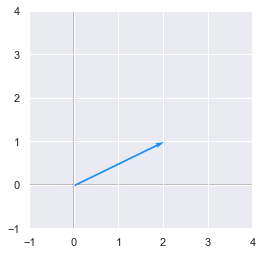

In [9]:
import numpy as np

#Creation of matrix A
A = np.array([[-1, 3], [2, -2]])
print(A)

#Creation of vecto v
v = np.array([[2], [1]])
print(v)

#Plotting vector v
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)


A simple vector

Now, let’s apply the matrix $\bf{A}$ to this vector. We’ll plot the old vector v (light blue) and the new one (orange):

[[1]
 [2]]


(-1.0, 4.0)

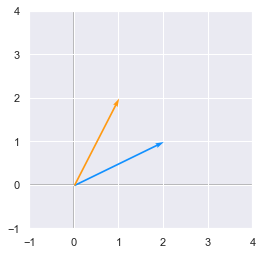

In [10]:
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)


The vector v
(blue) and its transformed version (orange)

We can see that applying the matrix A has the effect of modifying the vector.

So We can think of matrices as **linear transformation recipes**. Let’s see the case of a very special type of vector: the eigenvectors.

## Eigenvectors and eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix doesn’t change the direction of the vector. This special vector is called an eigenvector of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

This means that v is a eigenvector of A if v and Av (the transformed vector) are in the same direction. The output vector is just a scaled version of the input vector. This scalling factor is λ which is called the eigenvalue of A.



Mathematically, we have the following equation:

$$Av=\lambda v$$

The vector Av
is the vector v transformed by the matrix A. This transformed vector is a scaled version (scaled by the value λ) of the initial vector v.

### Example 2.

Let's $\bf{A}$ be the following matrix:

$$
\bf{A}=
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
$$

We know that one eigenvector of A is:

$$
\bf{v}=
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}
$$

We can check that $\bf{Av} = \lambda\bf{v}$:

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}=\begin{bmatrix}
    6\\\\
    6
\end{bmatrix}
$$

We can see that:

$$
6\times \begin{bmatrix}
    1\\\\
    1
\end{bmatrix} = \begin{bmatrix}
    6\\\\
    6
\end{bmatrix}
$$

which means that $\bf{v}$ is well an eigenvector of $\bf{A}$. Also, the corresponding eigenvalue is $\lambda=6$.

We can represent $\bf{v}$ and $\bf{Av}$ to check if their directions are the same:

In [12]:
A = np.array([[5, 1], [3, 3]])
A


array([[5, 1],
       [3, 3]])

In [13]:
v = np.array([[1], [1]])
v


array([[1],
       [1]])

(-1.0, 7.0)

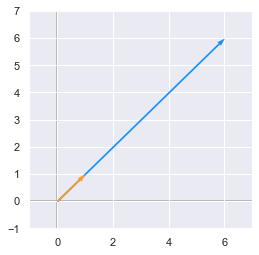

In [14]:
Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)


An eigenvector of a matrix doesn’t change direction when we apply this matrix

We can see that their directions are the same!

Another eigenvector of $\bf{A}$ is

$$
\bf{v}=
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$$

because

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix} = \begin{bmatrix}
    2\\\\
    -6
\end{bmatrix}
$$

and

$$
2 \times \begin{bmatrix}
    1\\\\
    -3
\end{bmatrix} =
\begin{bmatrix}
    2\\\\
    -6
\end{bmatrix}
$$

So the corresponding eigenvalue is $\lambda=2$.

In [15]:
v = np.array([[1], [-3]])
v


array([[ 1],
       [-3]])

(-1.0, 3.0)

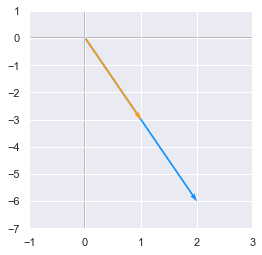

In [16]:
Av = A.dot(v)

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)


Another eigenvector and its transformation

This example shows that the eigenvectors v
are vectors that change only in scale when we apply the matrix A to them. Here the scales were 6 for the first eigenvector and 2 to the second but λ can take any real or even complex value.

## Find eigenvalues and eigenvectors in Python

Numpy provides a function returning eigenvectors and eigenvalues (the first array corresponds to the eigenvalues and the second to the eigenvectors concatenated in columns):

```python
(array([ 6.,  2.]), array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]]))
```

Here a demonstration with the preceding example.


In [17]:
A = np.array([[5, 1], [3, 3]])
A


array([[5, 1],
       [3, 3]])

In [18]:
np.linalg.eig(A)


(array([6., 2.]),
 array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

We can see that the eigenvalues are the same than the ones we used before: 6 and 2 (first array).

The eigenvectors correspond to the columns of the second array. This means that the eigenvector corresponding to $\lambda=6$ is:

$$
\begin{bmatrix}
    0.70710678\\\\
    0.70710678
\end{bmatrix}
$$

The eigenvector corresponding to $\lambda=2$ is:

$$
\begin{bmatrix}
    -0.31622777\\\\
    0.9486833
\end{bmatrix}
$$

The eigenvectors look different because they have not necessarly the same scaling than the ones we gave in the example. We can easily see that the first corresponds to a scaled version of our $\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}$. But the same property stands. We have still $\bf{Av} = \lambda\bf{v}$:

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
\begin{bmatrix}
    0.70710678\\\\
    0.70710678
\end{bmatrix}=
\begin{bmatrix}
    4.24264069\\\\
    4.24264069
\end{bmatrix}
$$

With $0.70710678 \times 6 = 4.24264069$. So there are an infinite number of eigenvectors corresponding to the eigenvalue $6$. They are equivalent because we are interested by their directions.

For the second eigenvector we can check that it corresponds to a scaled version of $\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}$. We can draw these vectors and see if they are parallel.

(-1.0, 3.0)

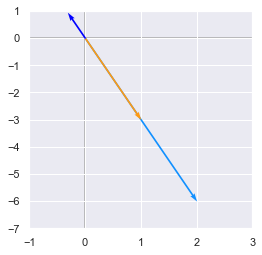

In [19]:
v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)


We can see that the vector found with Numpy (in dark blue) is a scaled version of our preceding $\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}$.

## Rescaled vectors

As we saw it with numpy, if $\bf{v}$ is an eigenvector of $\bf{A}$, then any rescaled vector $s\bf{v}$ is also an eigenvector of $\bf{A}$. The eigenvalue of the rescaled vector is the same.

Let's try to rescale

$$
\bf{v}=
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$$

from our preceding example. 

For instance,

$$
\bf{3v}=
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix}
$$

$$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix} =
\begin{bmatrix}
    6\\\\
    -18
\end{bmatrix} = 2 \times
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix}
$$

We have well $\bf{A}\times 3\bf{v} = \lambda\bf{v}$ and the eigenvalue is still $\lambda=2$.

## Concatenating eigenvalues and eigenvectors

Now that we have an idea of what eigenvectors and eigenvalues are we can see how it can be used to decompose a matrix. All eigenvectors of a matrix $\bf{A}$ can be concatenated in a matrix with each column corresponding to each eigenvector (like in the second array return by `np.linalg.eig(A)`):

$$
\bf{V}=
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
$$

The first column $
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}
$ corresponds to $\lambda=6$ and the second $
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$ to $\lambda=2$.

The vector $\bf{\lambda}$ can be created from all eigenvalues:

$$
\bf{\lambda}=
\begin{bmatrix}
    6\\\\
    2
\end{bmatrix}
$$

Then the eigendecomposition is given by

$$
\bf{A}=\bf{V}\cdot diag(\bf{\lambda}) \cdot \bf{V}^{-1}
$$

<span class='pquote'>
    We can decompose the matrix $\bf{A}$ with eigenvectors and eigenvalues. It is done with: $\bf{A}=\bf{V}\cdot diag(\bf{\lambda}) \cdot \bf{V}^{-1}$
</span>

$diag(\bf{v})$ is a diagonal matrix  containing all the eigenvalues. Continuing with our example we have

$$
\bf{V}=\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
$$

The diagonal matrix is all zeros except the diagonal that is our vector $\bf{\lambda}$.

$$
diag(\bf{v})=
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix}
$$

The inverse matrix of $\bf{V}$ can be calculated with numpy:

In [20]:
V = np.array([[1, 1], [1, -3]])
V


array([[ 1,  1],
       [ 1, -3]])

In [21]:
V_inv = np.linalg.inv(V)
V_inv


array([[ 0.75,  0.25],
       [ 0.25, -0.25]])

So let's plug

$$
\bf{V}^{-1}=\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}
$$

into our equation:

$$
\begin{align*}
&\bf{V}\cdot diag(\bf{\lambda}) \cdot \bf{V}^{-1}\\\\
&=
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}
\end{align*}
$$

If we do the dot product of the first two matrices we have:

$$
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix} =
\begin{bmatrix}
    6 & 2\\\\
    6 & -6
\end{bmatrix}
$$

So with replacing into the equation:

$$
\begin{align*}
&\begin{bmatrix}
    6 & 2\\\\
    6 & -6
\end{bmatrix}
\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    6\times0.75 + (2\times0.25) & 6\times0.25 + (2\times-0.25)\\\\
    6\times0.75 + (-6\times0.25) & 6\times0.25 + (-6\times-0.25)
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}=
\bf{A}
\end{align*}
$$

Let's check our result with Python:

In [22]:
lambdas = np.diag([6, 2])
lambdas


array([[6, 0],
       [0, 2]])

In [23]:
V.dot(lambdas).dot(V_inv)


array([[5., 1.],
       [3., 3.]])

That confirms our previous calculation.

## Real symmetric matrix

In the case of real symmetric matrices, the eigendecomposition can be expressed as

$$
\bf{A} = \bf{Q}\Lambda \bf{Q}^\text{T}
$$

where $\bf{Q}$ is the matrix with eigenvectors as columns and $\Lambda$ is $diag(\lambda)$.

### Example 3.

$$
\bf{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
$$

This matrix is symmetric because $\bf{A}=\bf{A}^\text{T}$. Its eigenvectors are:

$$
\bf{Q}=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$$

and its eigenvalues put in a diagonal matrix gives:

$$
\bf{\Lambda}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$$

So let's begin to calculate $\bf{Q\Lambda}$:

$$
\begin{align*}
\bf{Q\Lambda}&=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    0.89442719 \times 7 & -0.4472136\times 2\\\\
    0.4472136 \times 7 & 0.89442719\times 2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    6.26099033 & -0.8944272\\\\
    3.1304952 & 1.78885438
\end{bmatrix}
\end{align*}
$$

with:

$$
\bf{Q}^\text{T}=
\begin{bmatrix}
    0.89442719 & 0.4472136\\\\
    -0.4472136 & 0.89442719
\end{bmatrix}
$$

So we have:

$$
\begin{align*}
\bf{Q\Lambda} \bf{Q}^\text{T}&=
\begin{bmatrix}
    6.26099033 & -0.8944272\\\\
    3.1304952 & 1.78885438
\end{bmatrix}
\begin{bmatrix}
    0.89442719 & 0.4472136\\\\
    -0.4472136 & 0.89442719
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
\end{align*}
$$

It works! For that reason, it can useful to use symmetric matrices! Let's do the same things easily with `linalg` from numpy:

In [24]:
A = np.array([[6, 2], [2, 3]])
A


array([[6, 2],
       [2, 3]])

In [25]:
eigVals, eigVecs = np.linalg.eig(A)
eigVecs


array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [26]:
eigVals = np.diag(eigVals)
eigVals


array([[7., 0.],
       [0., 2.]])

In [27]:
eigVecs.dot(eigVals).dot(eigVecs.T)


array([[6., 2.],
       [2., 3.]])

We can see that the result corresponds to our initial matrix.

## BONUS: visualizing linear transformations

We can see the effect of eigenvectors and eigenvalues in linear transformation. We will see first how linear transformation works. Linear transformation is a mapping between an input vector and an output vector. Different operations like projection or rotation are linear transformations. Every linear transformations can be though as applying a matrix on the input vector. We will see the meaning of this graphically. For that purpose, let’s start by drawing the set of unit vectors (they are all vectors with a norm of 1).

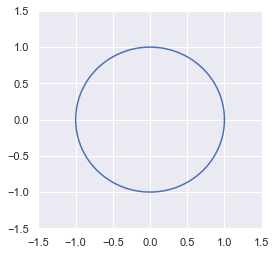

In [31]:
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

plt.figure()
plt.plot(x, y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


Then, we will transform each of these points by applying a matrix A.

This is the goal of the function bellow that takes a matrix as input and will draw

    - the origin set of unit vectors
    - the transformed set of unit vectors
    - the eigenvectors
    - the eigenvectors scalled by their eigenvalues

In [32]:
def linearTransformation(transformMatrix):
    orange = '#FF9A13'
    blue = '#1190FF'
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)

    # Calculate eigenvectors and eigenvalues
    eigVecs = np.linalg.eig(transformMatrix)[1]
    eigVals = np.diag(np.linalg.eig(transformMatrix)[0])

    # Create vectors of 0 to store new transformed values
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        # Apply the matrix to the vector
        newXY = transformMatrix.dot(unitVector_i)
        newX[i] = newXY[0]
        newY[i] = newXY[1]

    plotVectors([eigVecs[:,0], eigVecs[:,1]],
                cols=[blue, blue])
    plt.plot(x, y)

    plotVectors([eigVals[0,0]*eigVecs[:,0], eigVals[1,1]*eigVecs[:,1]],
                cols=[orange, orange])
    plt.plot(newX, newY)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()


In [35]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

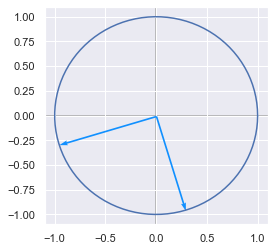

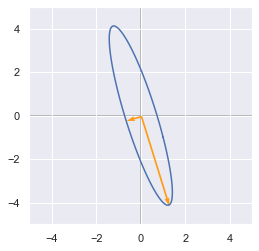

In [36]:
A = np.array([[1,-1], [-1, 4]])

linearTransformation(A)


The unit circle and its transformation by the matrix A. The vectors are the eigenvectors of A.

We can see the unit circle in dark blue, the non scaled eigenvectors in light blue, the transformed unit circle in green and the scaled eigenvectors in yellow.

It is worth noting that the eigenvectors are orthogonal here because the matrix is symmetric. Let’s try with a non-symmetric matrix:

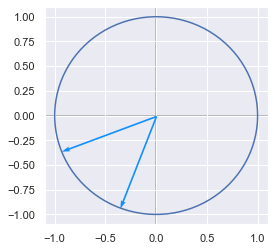

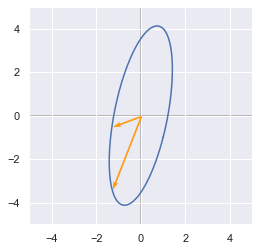

In [37]:
A = np.array([[1,1], [-1, 4]])
linearTransformation(A)


The unit circle and its transformation by the matrix A. The vectors are the eigenvectors of A (with A non symmetric).

In this case, the eigenvectors are not orthogonal!

# III. Singular Values decomposition

<img src="images/unit-circle-transformation1.png" width="400" alt="Plot of the unit circle and its transformation" title="Transformation of the unit circle">
<em>The unit circle and its transformation by a matrix.</em>

We saw that the eigendecomposition can be done only for square matrices. The way to go to decompose other types of matrices that can't be decomposed with eigendecomposition is to use **Singular Value Decomposition** (SVD).

We will decompose $\bf{A}$ into 3 matrices (instead of two with eigendecomposition):

<img src="images/singular-value-decomposition.png" width="300" alt="Illustration of the singular value decomposition" title="The singular value decomposition">
<em>The singular value decomposition</em>

The matrices $\bf{U}$, $\bf{D}$, and $\bf{V}$ have the following properties:

- $\bf{U}$ and $\bf{V}$ are orthogonal matrices ($\bf{U}^\text{T}=\bf{U}^{-1}$ and $\bf{V}^\text{T}=\bf{V}^{-1}$; 

- $\bf{D}$ is a diagonal matrix (all 0 except the diagonal ). However $\bf{D}$ is not necessarily square.

The columns of $\bf{U}$ are called the left-singular vectors of $\bf{A}$ while the columns of $\bf{V}$ are the right-singular vectors of $\bf{A}$. The values along the diagonal of $\bf{D}$ are the singular values of $\bf{A}$.

Here are the dimensions of the factorization:

<img src="images/singular-value-decomposition-understanding-dimensions.png" width="300" alt="Dimensions of the singular value decomposition (SVD)" title="The dimensions of the singular value decomposition (SVD)">
<em>The dimensions of the singular value decomposition</em>


# Intuition

I think that the intuition behind the singular value decomposition needs some explanations about the idea of matrix transformation. For that reason, here are several examples showing how the space can be transformed by 2D square matrices. Hopefully, this will lead to a better understanding of this statement: $\bf{A}$ is a matrix that can be seen as a linear transformation. This transformation can be decomposed in three sub-transformations: 1. rotation, 2. re-scaling, 3. rotation. These three steps correspond to the three matrices $\bf{U}$, $\bf{D}$, and $\bf{V}$.

<span class='pquote'>
    $\bf{A}$ is a matrix that can be seen as a linear transformation. This transformation can be decomposed in three sub-transformations: 1. rotation, 2. re-scaling, 3. rotation. These three steps correspond to the three matrices $\bf{U}$, $\bf{D}$, and $\bf{V}$.
</span>

You can look at [this animation](https://en.wikipedia.org/wiki/Singular-value_decomposition) from the Wikipedia article on the SVD. If you scroll down the page you will see each step.

### Every matrix can be seen as a linear transformation

You can see a matrix as a specific linear transformation. When you *apply* this matrix to a vector or to another matrix you will apply this linear transformation to it.

### Example 1.

We will modify the vector:

$$
\bf{v}=\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}
$$

by applying the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

We will have:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x + 0y\\\\
    0x + 2y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

We see that applying the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

just doubled each coordinate of our vector. Here are the graphical representation of $\bf{v}$ and its transformation $\bf{w}$:

<img src="images/transformation-vector-by-matrix.png" width="400" alt="Plot of a vector and its transformation" title="The matrix increased both coordinates of the vector">
<em>Applying the matrix on the vector multiplied each coordinate by two</em>

You can look at other examples of simple transformations on vectors and unit circle in [this video](https://www.youtube.com/watch?v=kJIUbtSowRg).


### Example 2.

To represent the linear transformation associated with matrices we can also draw the unit circle and see how a matrix can transform it (see the BONUS in [2.7](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/)). The unit circle represents the coordinates of every unit vectors (vector of length 1, see [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)).

<img src="images/unit-circle.png" width="200" alt="Representation of the unit circle" title="The unit circle">
<em>The unit circle</em>

It is then possible to apply a matrix to all these unit vectors to see the kind of deformation it will produce.

Again, let's apply the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to the unit circle:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

<img src="images/unit-circle-transformation.png" width="400" alt="Representation of the unit circle and its transformation" title="The unit circle and its transformation">
<em>Another representation of the effect of the matrix: each coordinate of the unit circle was multiplied by two</em>

We can see that the matrix doubled the size of the circle. But in some transformations, the change applied to the $x$ coordinate is different from the change applied to the $y$ coordinate. Let's see what it means graphically.

### Example 3.

We will apply the matrix:

$$
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to the unit circle:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}\cdot
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
$$

This gives the following new circle:

<img src="images/unit-circle-transformation1.png" width="400" alt="Representation of the unit circle and its transformation" title="The unit circle and its transformation">
<em>This time the matrix didn't rescale each coordinate with the same weight</em>

We can check that with the equations associated with this matrix transformation. Let's say that the coordinates of the new circle (after transformation) are $x'$ and $y'$. The relation between the old coordinates ($x$, $y$) and the new coordinates ($x'$, $y'$) is:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
\Leftrightarrow
\begin{cases}
x=\frac{x'}{3}\\\\
y=\frac{y'}{2}
\end{cases}
$$

We also know that the equation of the unit circle is $x^2+y^2=1$ (the norm of the unit vectors is 1, see [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/)). By replacement we end up with:

$$
\begin{align*}
\left(\frac{x'}{3}\right)^2 + \left(\frac{y'}{2}\right)^2 = 1\\\\
\left(\frac{y'}{2}\right)^2 = 1 - \left(\frac{x'}{3}\right)^2\\\\
\frac{y'}{2} = \sqrt{1 - \left(\frac{x'}{3}\right)^2}\\\\
y' = 2\sqrt{1 - \left(\frac{x'}{3}\right)^2}
\end{align*}
$$

We can check that this equation corresponds to our transformed circle. Let's start by drawing the old circle. Its equation is:

$$
\begin{align*}
x^2+y^2=1\\\\
y^2=1-x^2\\\\
y=\sqrt{1-x^2}
\end{align*}
$$

In [ ]:
# Plot style
sns.set()
#%pylab inline
mpl.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [95]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [96]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

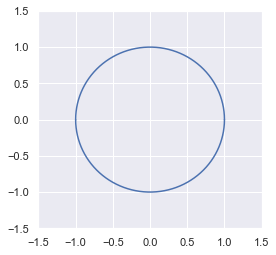

In [97]:
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

So far so good!

*Coding tip*: You can see the trick to plot a circle here: you create the $x$ variable, then $y$ is defined from $x$. This means that for each $x$, the corresponding $y$ value is calculated (and thus $y$ has the same shape as $x$). Since the result of the square root can be negative or positive (for instance, 4 can be the result of $2^2$ but also of $(-2)^2$) we need to plot both solutions ($y$ and $-y$ in `plt.plot`). Note also that a lot of values are needed if we want the connection between the two demi-spheres. See also some discussion [here](https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle).


Now let's add the circle obtained after matrix transformation. We saw that it is defined with

$$
y = 2\sqrt{1 - \left(\frac{x}{3}\right)^2}
$$

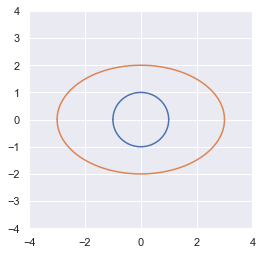

In [98]:
x1 = np.linspace(-3, 3, 100000)
y1 = 2*np.sqrt(1-((x1/3)**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.plot(x1, y1, sns.color_palette().as_hex()[1])
plt.plot(x1, -y1, sns.color_palette().as_hex()[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

This shows that our transformation was correct.

Note that these examples used **diagonal matrices** (all zeros except the diagonal). The general rule is that the transformation associated with diagonal matrices imply only a rescaling of each coordinate **without rotation**. This is a first element to understand the SVD. Look again at the decomposition

<img src="images/singular-value-decomposition.png" width="300">

<span class='pquote'>
    The transformation associated with diagonal matrices imply only a rescaling of each coordinate **without rotation**
</span>

We saw that the matrix $\bf{D}$ is a diagonal matrix. And we saw also that it corresponds to a rescaling without rotation.

### Example 4. rotation matrix

Matrices that are not diagonal can produce a rotation (see more details [here](https://en.wikipedia.org/wiki/Rotation_matrix)). Since it is easier to think about angles when we talk about rotation, we will use a matrix of the form

$$
R=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
$$

This matrix will rotate our vectors or matrices counterclockwise through an angle $\theta$. Our new coordinates will be

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    xcos(\theta) - ysin(\theta)\\\\
    xsin(\theta) + ycos(\theta)
\end{bmatrix}
$$

Let's rotate some vectors through an angle of $\theta = 45^\circ$.

Let's start with the vector $\bf{u}$ of coordinates $x=0$ and $y=1$ and the vector $\bf{v}$ of coordinates $x=1$ and $y=0$. The vectors $\bf{u'}$ $\bf{v'}$ are the rotated vectors.

<img src="images/unit-vectors-rotation.png" width="200" alt="Rotation of the unit vectors through matrix operation" title="Rotation of the unit vectors">
<em>Counter clockwise rotation of the unit vectors with $\theta = 45^\circ$</em>

First, let's plot $\bf{u}$ and $\bf{v}$.

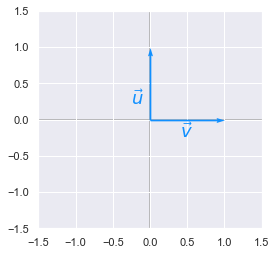

In [99]:
orange = '#FF9A13'
blue = '#1190FF'
    
u = [1,0]
v = [0,1]

plotVectors([u, v], cols=[blue, blue])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.2, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18)
plt.show()

They are the <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">basis vectors</a> of our space. We will calculate the transformation of these vectors:

$$
\begin{cases}
u_x = 0\cdot cos(45) - 1\cdot sin(45)\\\\
u_y = 0\cdot sin(45) + 1\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
u_x = -sin(45)\\\\
u_y = cos(45)
\end{cases}
$$

$$
\begin{cases}
v_x = 1\cdot cos(45) - 0\cdot sin(45)\\\\
v_y = 1\cdot sin(45) + 0\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
v_x = cos(45)\\\\
v_y = sin(45)
\end{cases}
$$

We will now plot these new vectors to check that they are well our basis vectors rotated through an angle of $45^\circ$.

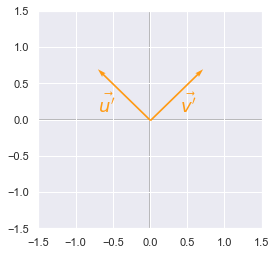

In [100]:
u1 = [-np.sin(np.radians(45)), np.cos(np.radians(45))]
v1 = [np.cos(np.radians(45)), np.sin(np.radians(45))]

plotVectors([u1, v1], cols=[orange, orange])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.7, 0.1, r"$\vec{u'}$", color=orange, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=orange, size=18)
plt.show()

*Coding tip:* the numpy functions `sin` and `cos` take input in radians. We can convert our angle from degrees to radians with the function `np.radians()`.

We can also transform a circle. We will take a rescaled circle (the one from the example 3.) to be able to see the effect of the rotation.

<img src="images/rescaled-circle-rotated.png" width="300" alt="A rescaled circle (not the same hight and width) rotated" title="Rescaled circle rotated">
<em>The effect of a rotation matrix on a rescaled circle</em>

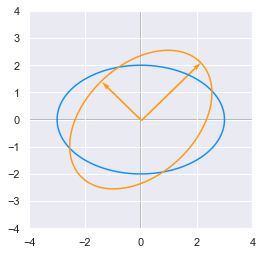

In [101]:
x = np.linspace(-3, 3, 100000)
y = 2*np.sqrt(1-((x/3)**2))

x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]

plotVectors([u1, v1], cols=['#FF9A13', '#FF9A13'])

plt.plot(x, y, '#1190FF')
plt.plot(x, -y, '#1190FF')

plt.plot(x1, y1, '#FF9A13')
plt.plot(x1_neg, y1_neg, '#FF9A13')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

We can see that the circle has been rotated by an angle of $45^\circ$. We have chosen the length of the vectors from the rescaling weight from example 3 (factor 3 and 2) to match the circle.

### Summary

I hope that you got how vectors and matrices can be transformed by rotating or scaling matrices. The SVD can be seen as the decomposition of one complex transformation in 3 simpler transformations (a rotation, a scaling and another rotation).

Note that we took only square matrices. The SVD can be done even with non square matrices but it is harder to represent transformation associated with non square matrices. For instance, a 3 by 2 matrix will map a 2D space to a 3D space.

<img src="images/non-square-matrix-change-dimensions.png" width="250" alt="A non square matrix change the number of dimensions of the input" title="Example of a change of dimensions">
<em>A non square matrix change the number of dimensions of the input</em>

# The three transformations

Now that the link between matrices and linear transformation is clearer we can check that a transformation associated with a matrix can be decomposed with the help of the SVD.

But first let's create a function that takes a 2D matrix as an input and draw the unit circle transformation when we apply this matrix to it. It will be useful to visualize the transformations.

In [102]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))
    
    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y
    
    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    
    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

We can use it to check that the three transformations given by the SVD are equivalent to the transformation done with the original matrix. We will also draw each step of the SVD to see the independant effect of the first rotation, the scaling and the second rotation.

We will use the matrix:

$$
\bf{A}=\begin{bmatrix}
    3 & 7\\\\
    5 & 2
\end{bmatrix}
$$

and plot the unit circle and its transformation by $\bf{A}$:

Unit circle:


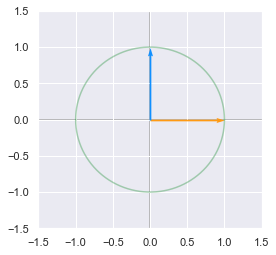

Unit circle transformed by A:


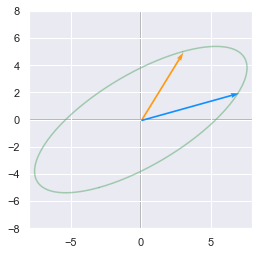

In [104]:
A = np.array([[3, 7], [5, 2]])

print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

This is what we get when we apply the matrix $\bf{A}$ to the unit circle and the basis vectors. We can see that the two base vectors are not necessarily rotated the same way. This is related to the sign of the determinant of the matrix .

Let's now compute the SVD of $\bf{A}$:

In [105]:
U, D, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [106]:
D

array([8.71337969, 3.32821489])

In [107]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

We can now look at the sub-transformations by looking at the effect of the matrices $\bf{U}$, $\bf{D}$ and $\bf{V}$ in the reverse order. Note that it returns the right singular vector **already transposed** (see the [doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html)).

Unit circle:


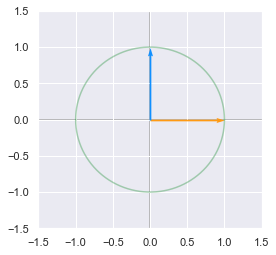

First rotation:


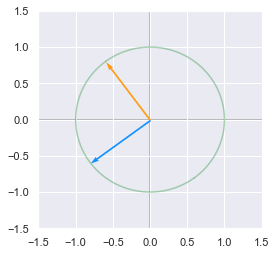

Scaling:


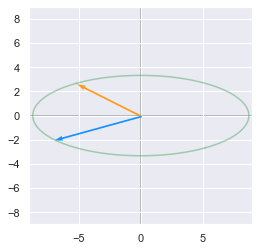

Second rotation:


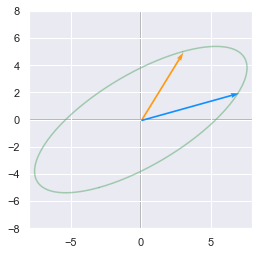

In [108]:
# Unit circle
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Just to be sure, you can compare this last step with the transformation by $\bf{A}$. Fortunately, you will see that the result is the same:

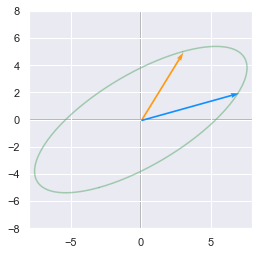

In [109]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# Singular values interpretation

The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector ($u_1$) and its norm will be the first singular value ($\sigma_1$).

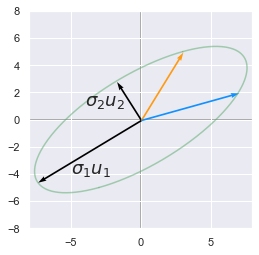

In [110]:
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]

plotVectors([u1, v1], cols=['black', 'black'])

matrixToPlot(A)

plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
plt.text(-4, 1, r"$\sigma_2u_2$", size=18)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

They are the major ($\sigma_1u_1$) and minor ($\sigma_2u_2$) axes of the elipse. We can see that the feature corresponding to this major axis is associated with more variance (the range of value on this axis is bigger than the other). 

# SVD and eigendecomposition

Now that we understand the kind of decomposition done with the SVD, we want to know how the sub-transformations are found.

The matrices $\bf{U}$, $\bf{D}$ and $\bf{V}$ can be found by transforming $\bf{A}$ in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtain by multiplying the matrix $\bf{A}$ by its transpose in one way or the other:

- $\bf{U}$ corresponds to the eigenvectors of $\bf{AA}^\text{T}$
- $\bf{V}$ corresponds to the eigenvectors of $\bf{A^\text{T}A}$
- $\bf{D}$ corresponds to the eigenvalues $\bf{AA}^\text{T}$ or $\bf{A^\text{T}A}$ which are the same.

Let's take an example of a non square matrix:

$$
\bf{A}=\begin{bmatrix}
    7 & 2\\\\
    3 & 4\\\\
    5 & 3
\end{bmatrix}
$$

The singular value decomposition can be done with the `linalg.svd()` function from Numpy (note that `np.linalg.eig(A)` works only on square matrices and will give an error for `A`).

In [111]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [112]:
D

array([10.25142677,  2.62835484])

In [113]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

## The left-singular values

The left-singular values of $\bf{A}$ correspond to the eigenvectors of $\bf{AA}^\text{T}$.

### Example 5.

Note that the sign difference comes from the fact that eigenvectors are not unique. The `linalg` functions from Numpy return the normalized eigenvectors. Scaling by `-1` doesn't change their direction or the fact that they are unit vectors.

In [114]:
U, D, V = np.linalg.svd(A)

Left singular vectors of A:

In [115]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

Eigenvectors of AA_transpose:

In [116]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

## The right-singular values

The right-singular values of $\bf{A}$ correspond to the eigenvectors of $\bf{A}^\text{T}\bf{A}$.

### Example 6.

In [118]:
U, D, V = np.linalg.svd(A)

Right singular vectors of A:

In [119]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

Eigenvectors of A_transposeA:

In [120]:
np.linalg.eig(A.T.dot(A))[1]

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

## The nonzero singular values

The nonzero singular values of $\bf{A}$ are the square roots of the eigenvalues of $\bf{A}^\text{T}\bf{A}$ and $\bf{AA}^\text{T}$.

### Example 7.

In [121]:
U, D, V = np.linalg.svd(A)
D

array([10.25142677,  2.62835484])

Eigenvalues of A_transposeA:

In [122]:
np.linalg.eig(A.T.dot(A))[0]

array([105.09175083,   6.90824917])

Eigenvalues of AA_transpose:

In [123]:
np.linalg.eig(A.dot(A.T))[0]

array([105.09175083,   6.90824917,   0.        ])

Square root of the eigenvalues:

In [ ]:
np.sqrt(np.linalg.eig(A.T.dot(A))[0])

In [71]:
import numpy as np
X = np.random.rand(5, 3) # create random data matrix
U, S, V = np.linalg.svd(X,full_matrices=True) #% full SVD
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False)#economy SVD

In [72]:
print("The random matrix is:\n",X)

The random matrix is:
 [[0.72953202 0.659867   0.29181511]
 [0.12396079 0.36004011 0.34187115]
 [0.6366383  0.21323178 0.28187403]
 [0.14772216 0.47658687 0.9170158 ]
 [0.16183829 0.39085243 0.42718124]]


In [15]:
print("The  matrix U is: \n ", U)
print("The  matrix SIGMA is: \n ", S)
print("The  matrix V is: \n ", V)

The  matrix U is: 
  [[-0.32655693 -0.55588236  0.29776214 -0.70144456 -0.06056897]
 [-0.44244162  0.74920996  0.33381134 -0.26722217  0.245137  ]
 [-0.45639322  0.15876009 -0.40941088 -0.02033514 -0.77360822]
 [-0.57584023 -0.29474752  0.38063481  0.65801944  0.06049377]
 [-0.39713883 -0.13265884 -0.69814581 -0.05625601  0.57802255]]
The  matrix SIGMA is: 
  [2.50615711 0.56209102 0.28985856]
The  matrix V is: 
  [[-0.57896768 -0.36461336 -0.72928288]
 [ 0.03584984 -0.90495971  0.42398432]
 [ 0.81456197 -0.21932855 -0.53701376]]


In [16]:
print("The  matrix Uhat is: \n ", Uhat)
print("The  matrix SIGMAhat is: \n ", Shat)
print("The  matrix Vhat is: \n ", Vhat)

The  matrix Uhat is: 
  [[-0.32655693 -0.55588236  0.29776214]
 [-0.44244162  0.74920996  0.33381134]
 [-0.45639322  0.15876009 -0.40941088]
 [-0.57584023 -0.29474752  0.38063481]
 [-0.39713883 -0.13265884 -0.69814581]]
The  matrix SIGMAhat is: 
  [2.50615711 0.56209102 0.28985856]
The  matrix Vhat is: 
  [[-0.57896768 -0.36461336 -0.72928288]
 [ 0.03584984 -0.90495971  0.42398432]
 [ 0.81456197 -0.21932855 -0.53701376]]


The proposed implementation of SVD consists of evaluating eigenvalues and eigenvectors of A\*A with numpy library *linalg.eig* to get V and the singular values<br>
Then the singular values are sorted, and so the singular vectors in V<br>
We consider only non-zero singular values<br>
Then U is computed solving the linear equation with A, V and Σ.

In [85]:
def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = np.linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

The singular values stored inside Σ have very different values, they indicates how much "relevant" that singular values are.<br>
So we can just take the first k singular values, truncating Σ and consequently V and U.<br>
In this way the matrix product is still doable and the resulting matrix has the same shape as the original.<br>
If we use svd for dimensionality reduction we just need to keep U and Σ, because V is just used to *project the lower rank matrix **UΣ** into the previous dimension*.

In [86]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

# Applications of SVD:   SVD for dimensionality reduction
We can see how svd decomposition applies to dimensionality reduction, in this example, using the **Iris dataset** available directly from library *sklearn*


In [73]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [74]:
data = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
data.columns = feature_names
data["labels"] = iris.target

This is a custom version of the *sns.pairplot* with violins instead of histograms and scatters colored according to the class

In [88]:
def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])

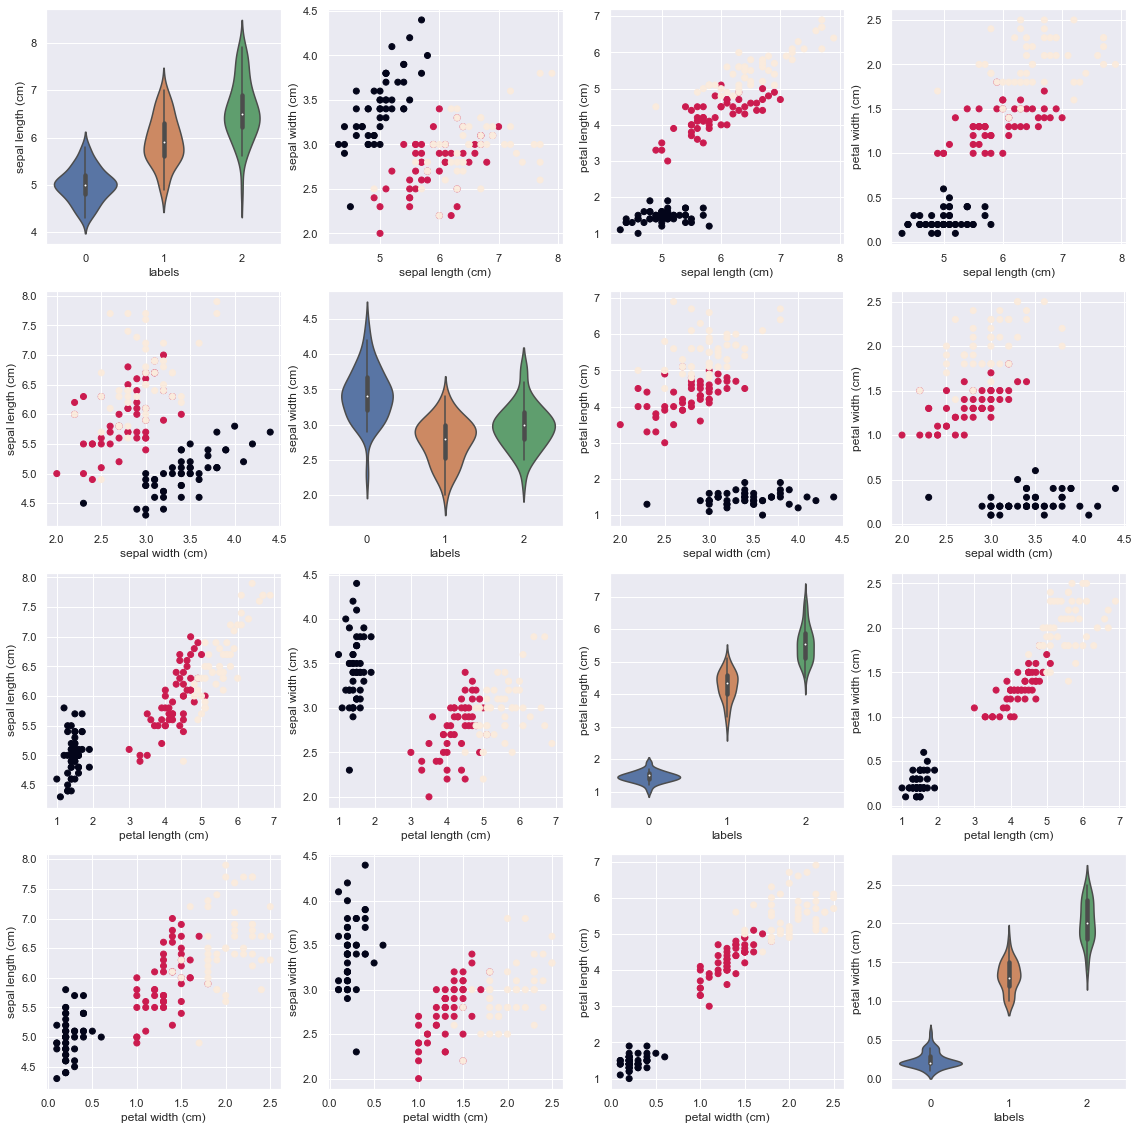

In [77]:
custom_pairplot(data, feature_names=feature_names, labels="labels")

Let's apply SVD decomposition to keep only two dimensions (k=2)<br>

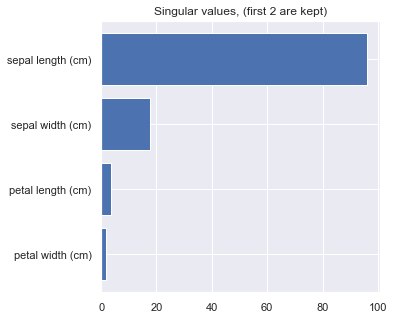

In [89]:
k = 2

A = data[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)
plt.figure(figsize=(5, 5))
plt.barh(feature_names[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

As we can see, keeping two dimensions leads to quite well separated classes.<br>
In this case working on 4 features instead of 2 is not a problem but in other context dimensionality reductions is almost mandatory

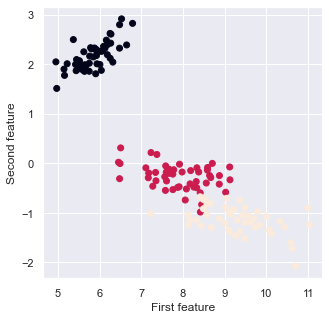

In [90]:
plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = iris.target)
plt.xlabel("First feature")
plt.ylabel("Second feature");

# BONUS SVD for Image Compression
Now we can see how to apply svd to image compression<br>

## Images as matrices

We can represent images as matrices, as follows.

Consider an image having n x m pixels. 

- For gray scale images, we need one number per pixel, which can be represented as a n x m matrix. 

- For color images, we need 3 numbers per pixel, for each color: red, green and blue (RGB). 

        - Each color can be represented as a n x m matrix, 
        
        - and we can represent the full color image as a n x 3m matrix, where we stack each color's matrix column-wise alongside of each other, as A=[A_{red},A_{green},A_{blue}]. 

# Apply the SVD on images

In this example, we will use the SVD to extract the more important features from the image. It is nice to see the effect of the SVD on something very visual. The code is inspired/taken from [this blog post](https://www.frankcleary.com/svdimage/).

Let's start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

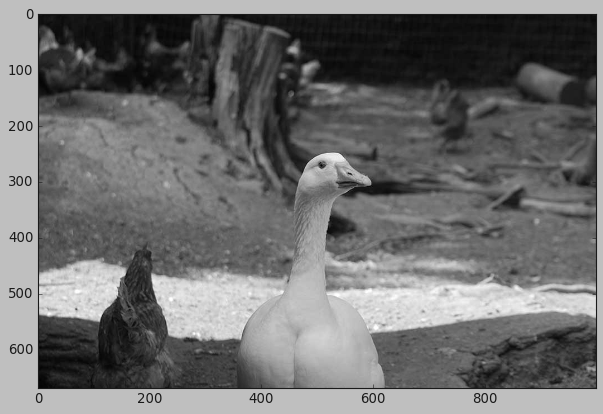

In [125]:
from PIL import Image

plt.style.use('classic')
img = Image.open('test_svd.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

We will see how to test the effect of SVD on **Lucy the goose**! Let's start to extract the left singular vectors, the singular values and the right singular vectors:

In [126]:
U, D, V = np.linalg.svd(imgmat)

Let's check the shapes of our matrices:

In [127]:
imgmat.shape

(669, 1000)

In [128]:
U.shape

(669, 669)

In [129]:
D.shape

(669,)

In [130]:
V.shape

(1000, 1000)

Remember that $\bf{D}$ are the singular values that need to be put into a diagonal matrix. Also, $\bf{V}$ doesn't need to be transposed (see above).

The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

We can reconstruct an image from a certain number of singular values. For instance for 2 singular values we will have:

<img src="images/dimensions-reconstruction-image-singular-value-decomposition.png" width="400" alt="The dimensions of singular value decomposition to reconstruct image from few components" title="Image reconstruction dimensions">
<em>We can reconstruct the image from few components</em>

In this example, we have reconstructed the 669px by 1000px image from two singular values. 

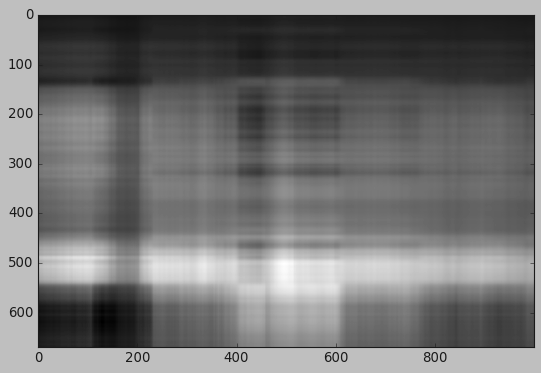

In [134]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

It is hard to see Lucy with only two singular values and singular vectors. But we already see something!

We will now draw the reconstruction using different number of singular values.

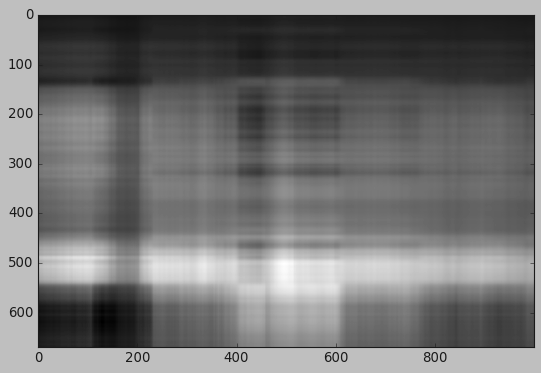

In [131]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

Whaou! Even with 50 components, the quality of the image is not bad!

# Conclusion

I like this part on the SVD because it uses what we have learned so far in a concrete application. The next point to explore is the pseudo-inverse. This one is quite cool. You will see how to find a near-solution of a system of equation that minimizes the error.

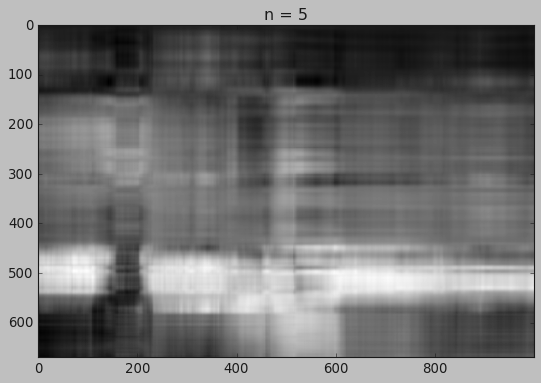

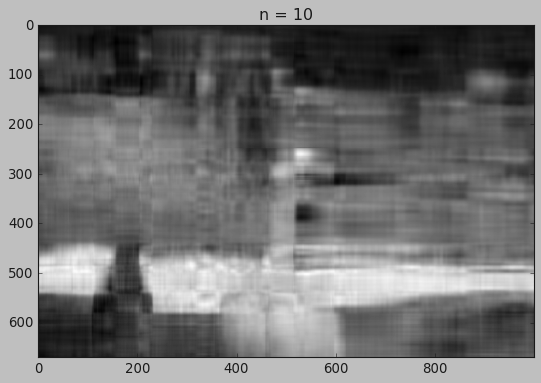

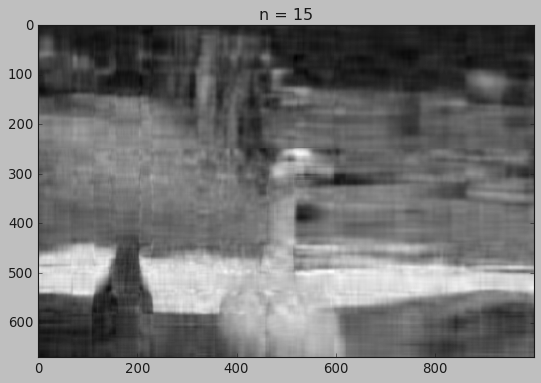

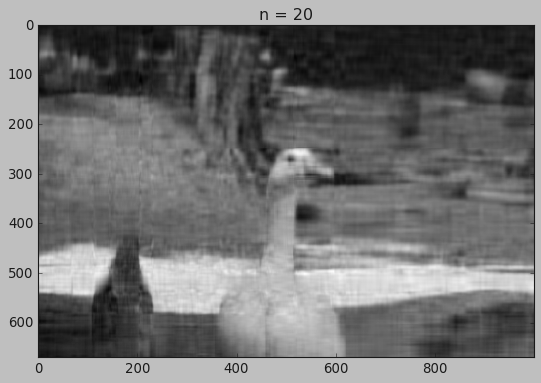

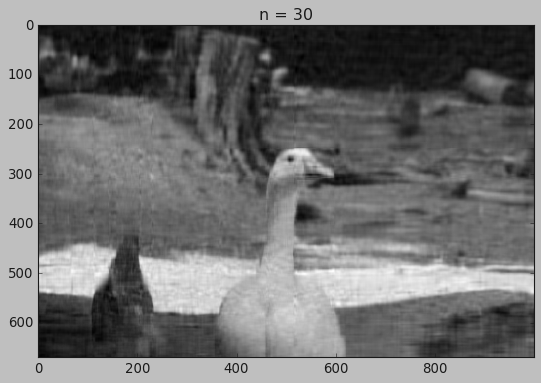

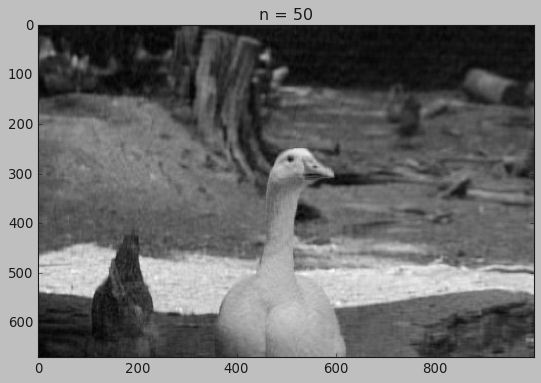

In [133]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## SVD for image compressing

(325, 650, 3)
[[ 77.66666667  77.66666667  77.66666667 ...  72.66666667  72.
   72.66666667]
 [ 77.66666667  77.66666667  77.66666667 ...  72.          71.
   71.        ]
 [ 78.66666667  78.66666667  78.66666667 ...  70.          71.
   71.        ]
 ...
 [ 24.          24.          24.         ... 162.         159.
  156.        ]
 [ 25.          25.          24.33333333 ... 161.33333333 159.
  157.        ]
 [ 24.33333333  25.33333333  24.33333333 ... 160.33333333 159.
  158.66666667]]
(325, 650)


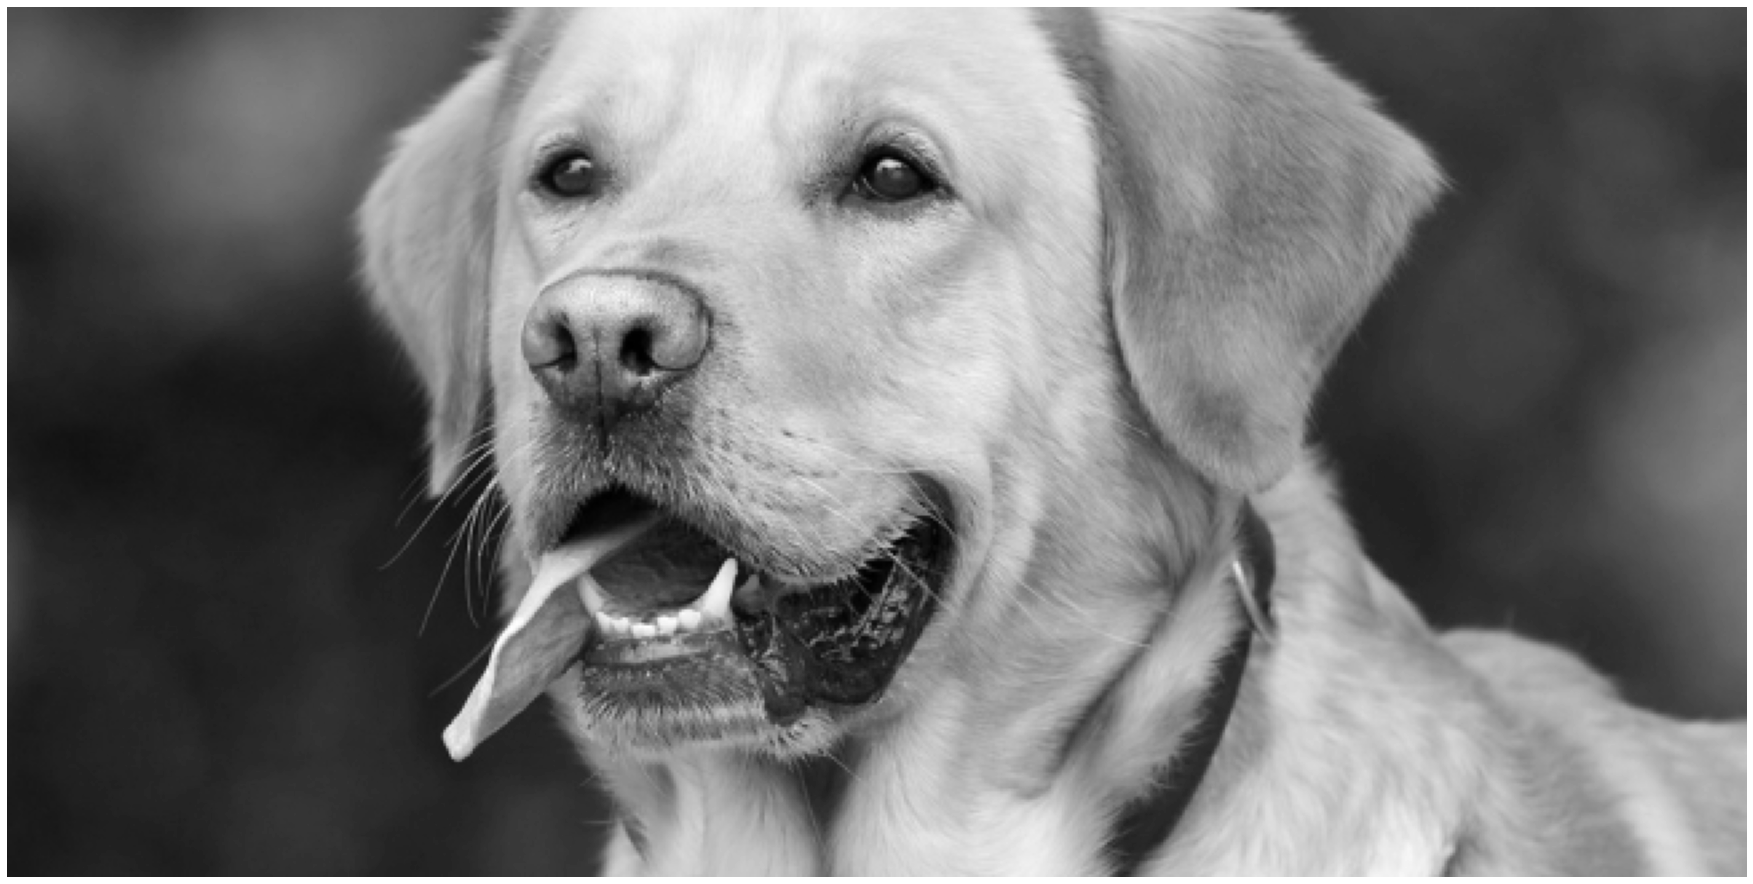

(731, 700, 3)
(731, 700)


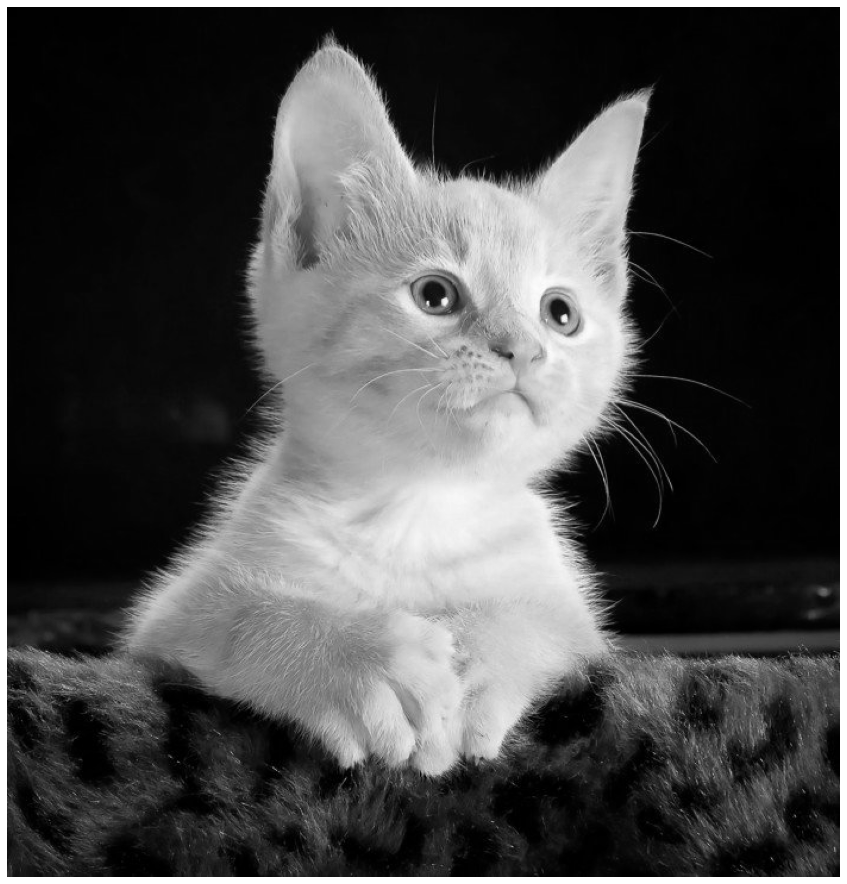

In [91]:
# importing the necessary libraries

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
#import matplotlib.image as mpimg


#Reading our image and setting the size and the colour
plt.rcParams['figure.figsize']=[32,16]

#The file must be in the same folder
A=imread('dog.jpg') #load the dog image in integer format as a 3D-array

B=imread('kitty.jpeg') #load the kitty image in integer format as a 3D-array
print(A.shape)

X=np.mean(A,-1) #convert RGB to grayscale
print(X)
print(X.shape)


img1=plt.imshow(X)
img1.set_cmap('gray')
plt.axis('off')
plt.show()
print(B.shape)
Y=np.mean(B,-1) #convert RGB to grayscale
print(Y.shape)
img2=plt.imshow(Y)
img2.set_cmap('gray')
plt.axis('off')
plt.show()




In [ ]:
#from scipy import misc
#import matplotlib.pyplot as plt
#face = misc.face(gray=True)
#plt.imshow(face, cmap=plt.cm.gray)
#plt.show()

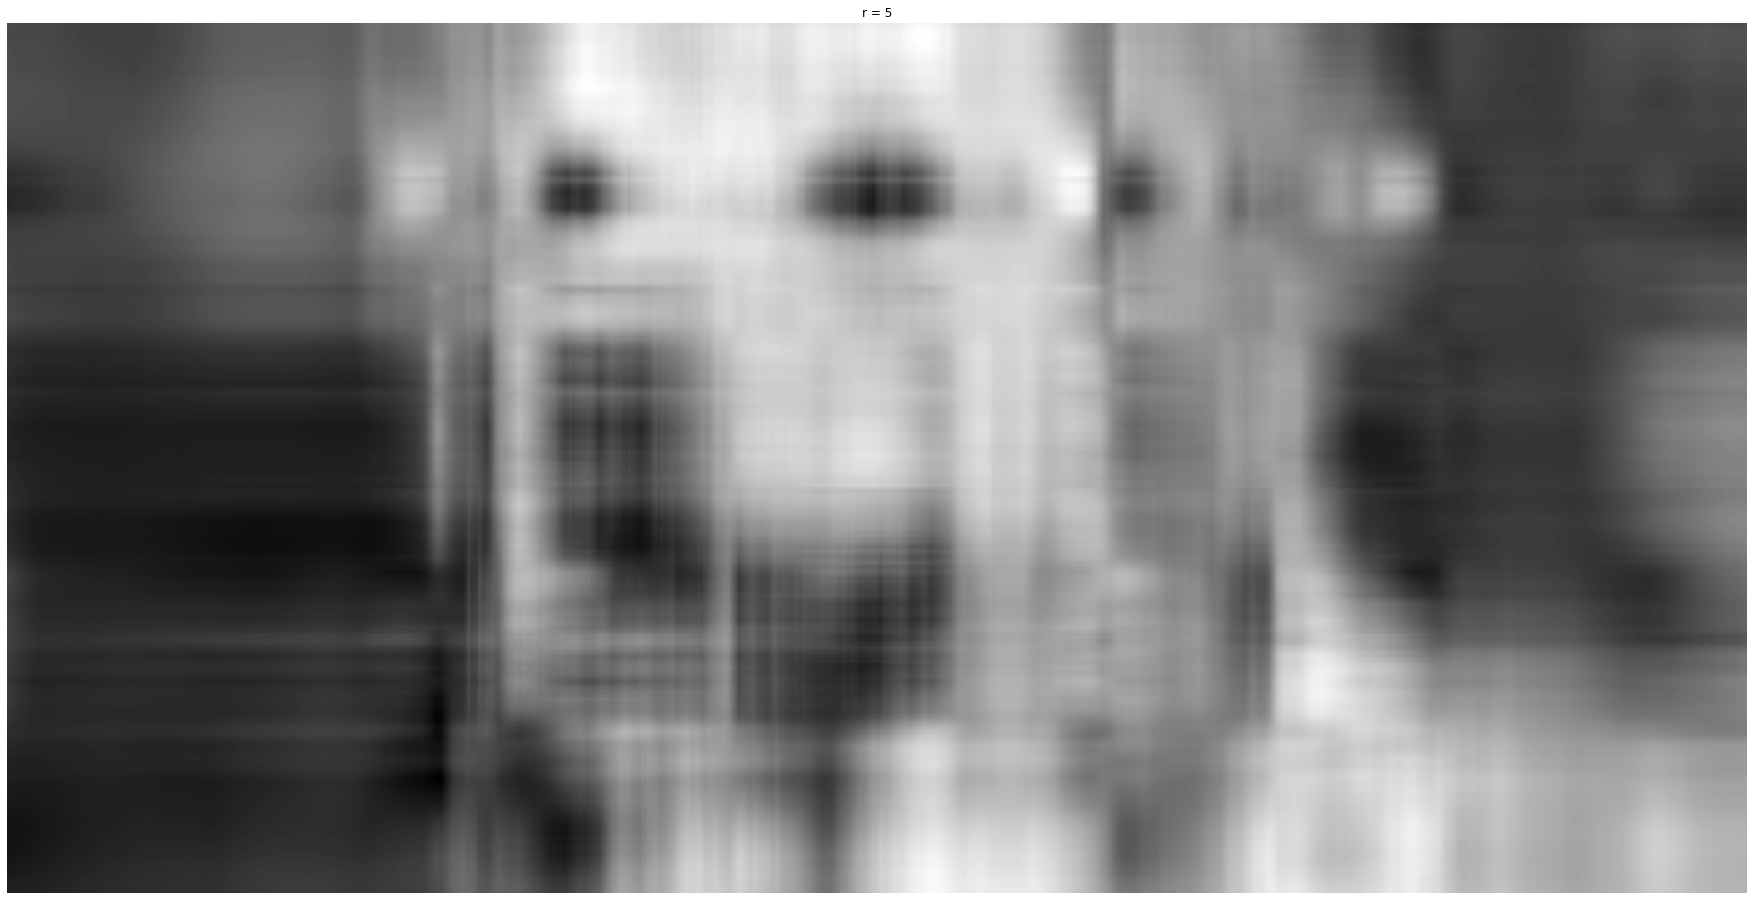

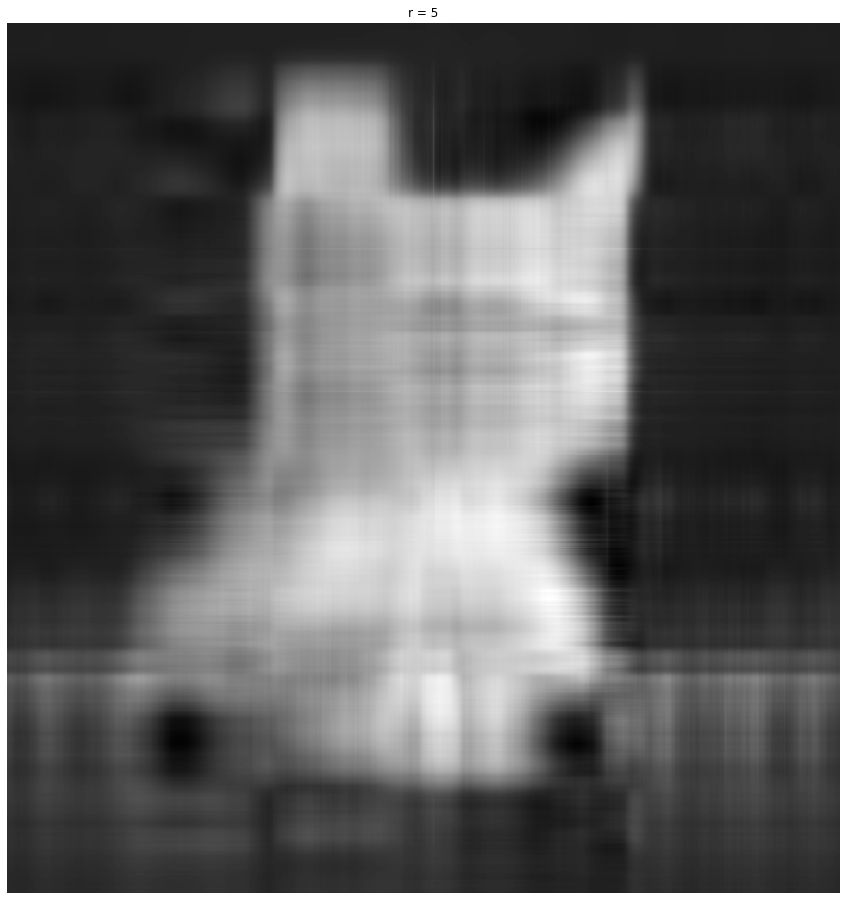

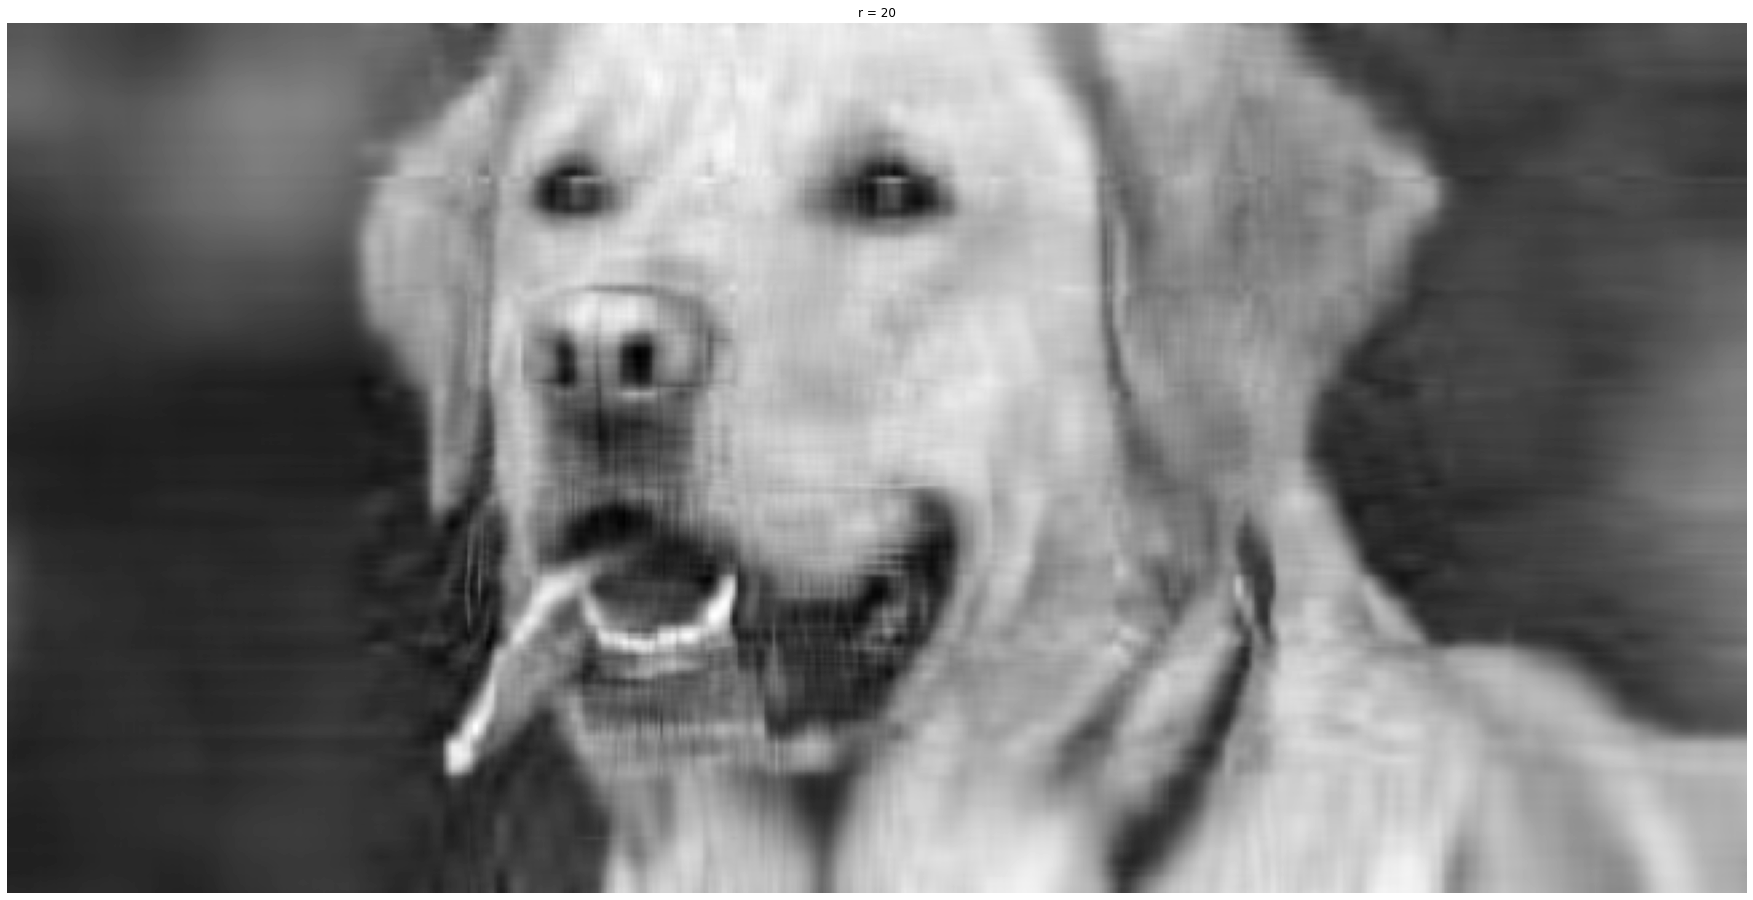

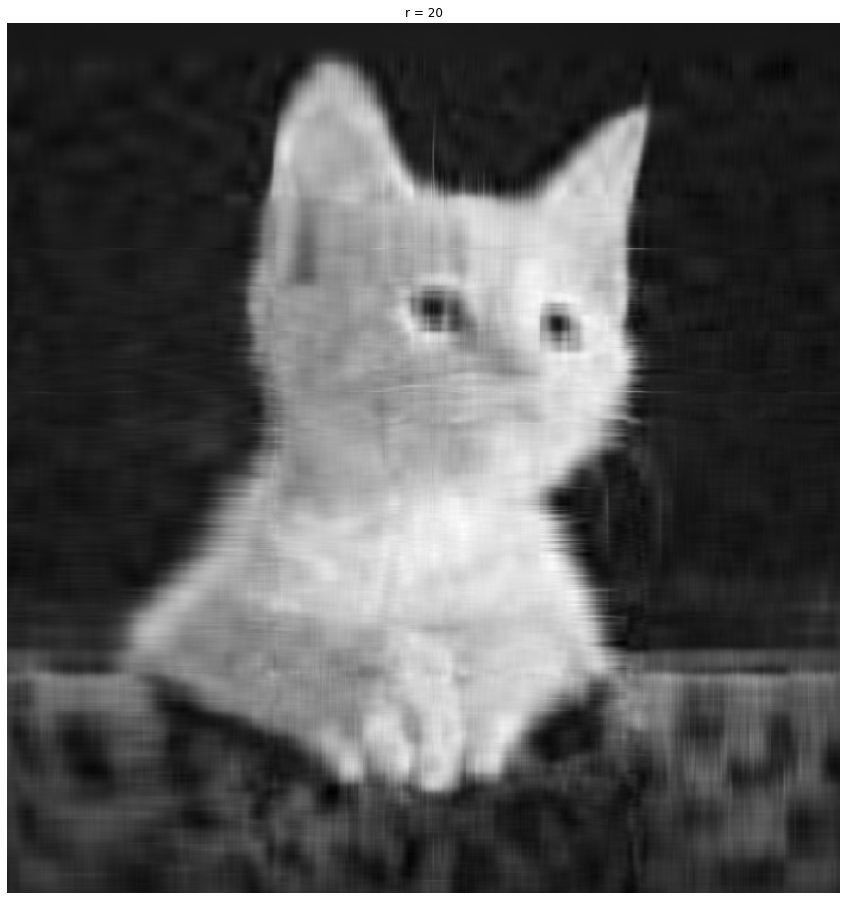

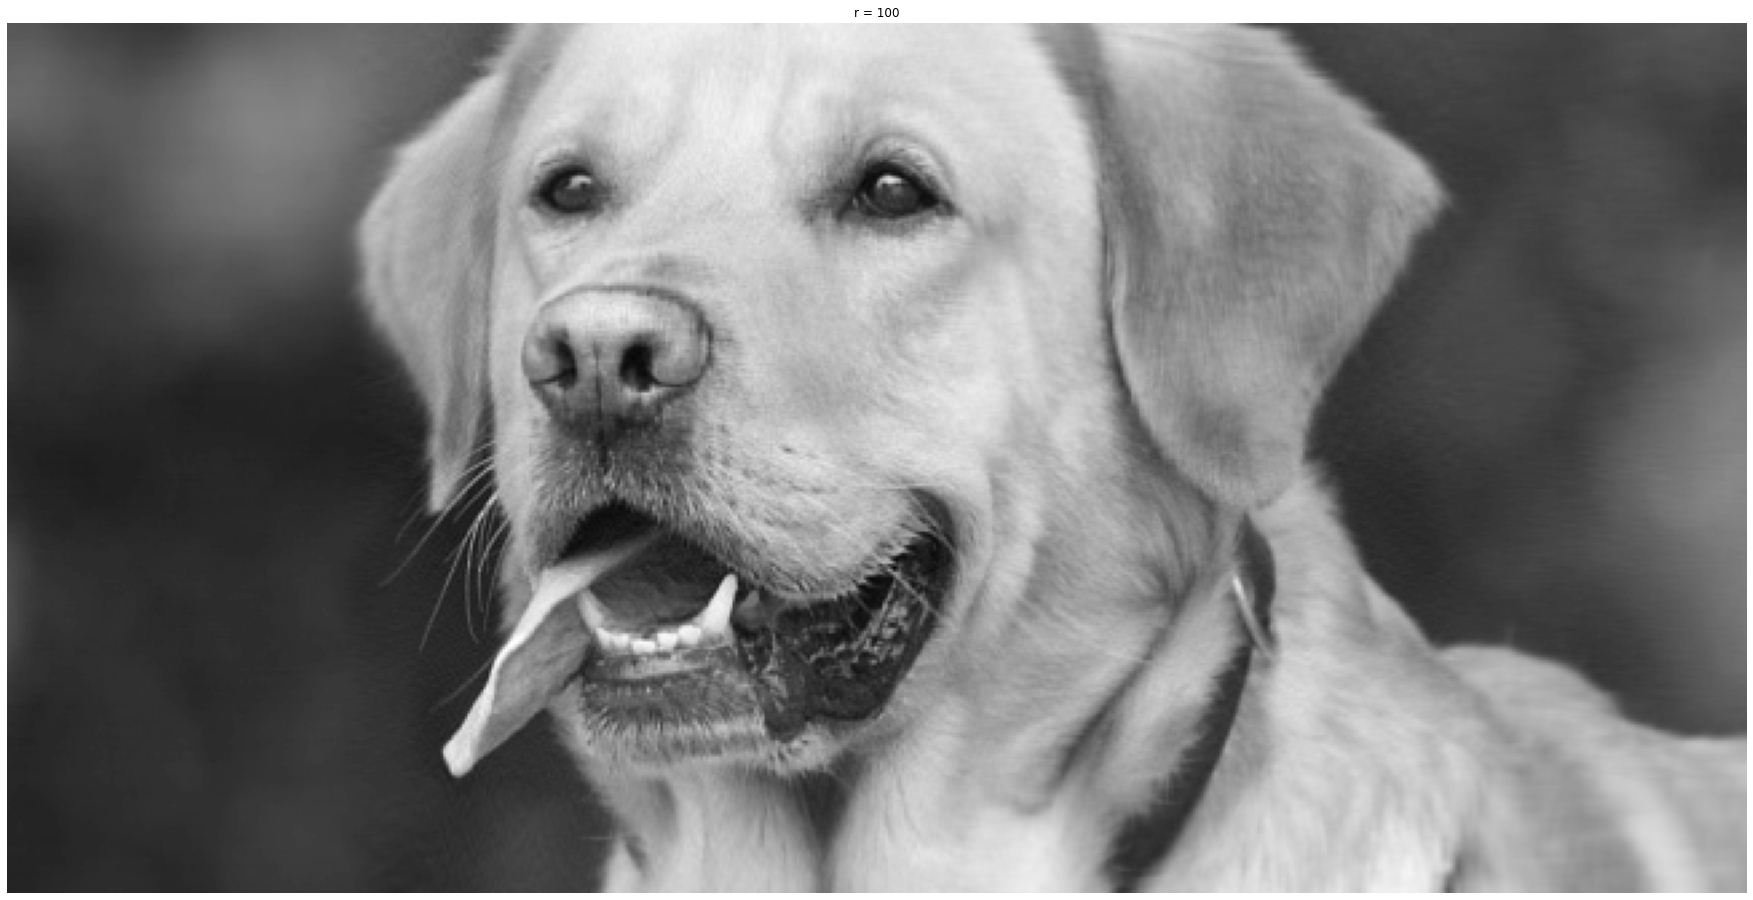

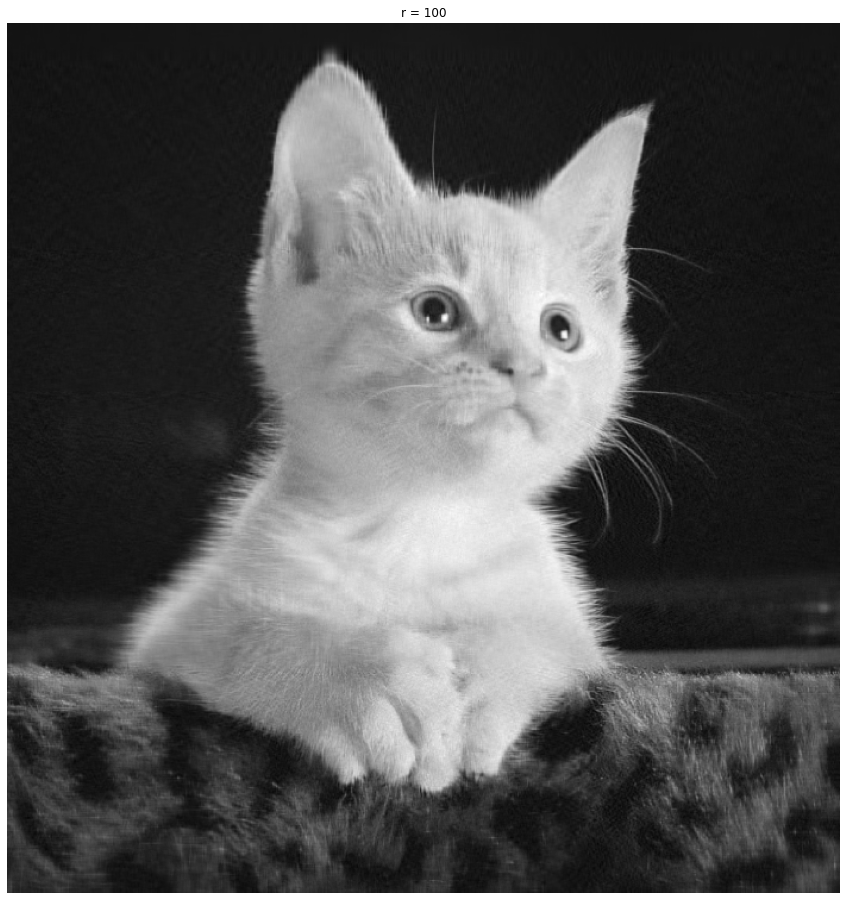

In [37]:
U1, S1, V1T= np.linalg.svd(X,full_matrices=False) #% full SVD
U2, S2, V2T= np.linalg.svd(Y,full_matrices=False) #% full SVD
#Extract the singular values from the Sigma Matrix

S1= np.diag(S1)
S2= np.diag(S2)
j=0
for r in (5, 20, 100):
    #Constructing the approximate images in the setted rand
    Xapprox = U1[:,:r] @ S1[0:r, :r]@ V1T[:r,:]
    Yapprox = U2[:,:r] @ S2[0:r, :r]@ V2T[:r,:]
    plt.figure(j+1)
    j+=1
    #img=plt.imshow(256-Xapprox)
    img1=plt.imshow(Xapprox)
   
    img1.set_cmap('gray')
    
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()
    img2=plt.imshow(Yapprox)
    img2.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

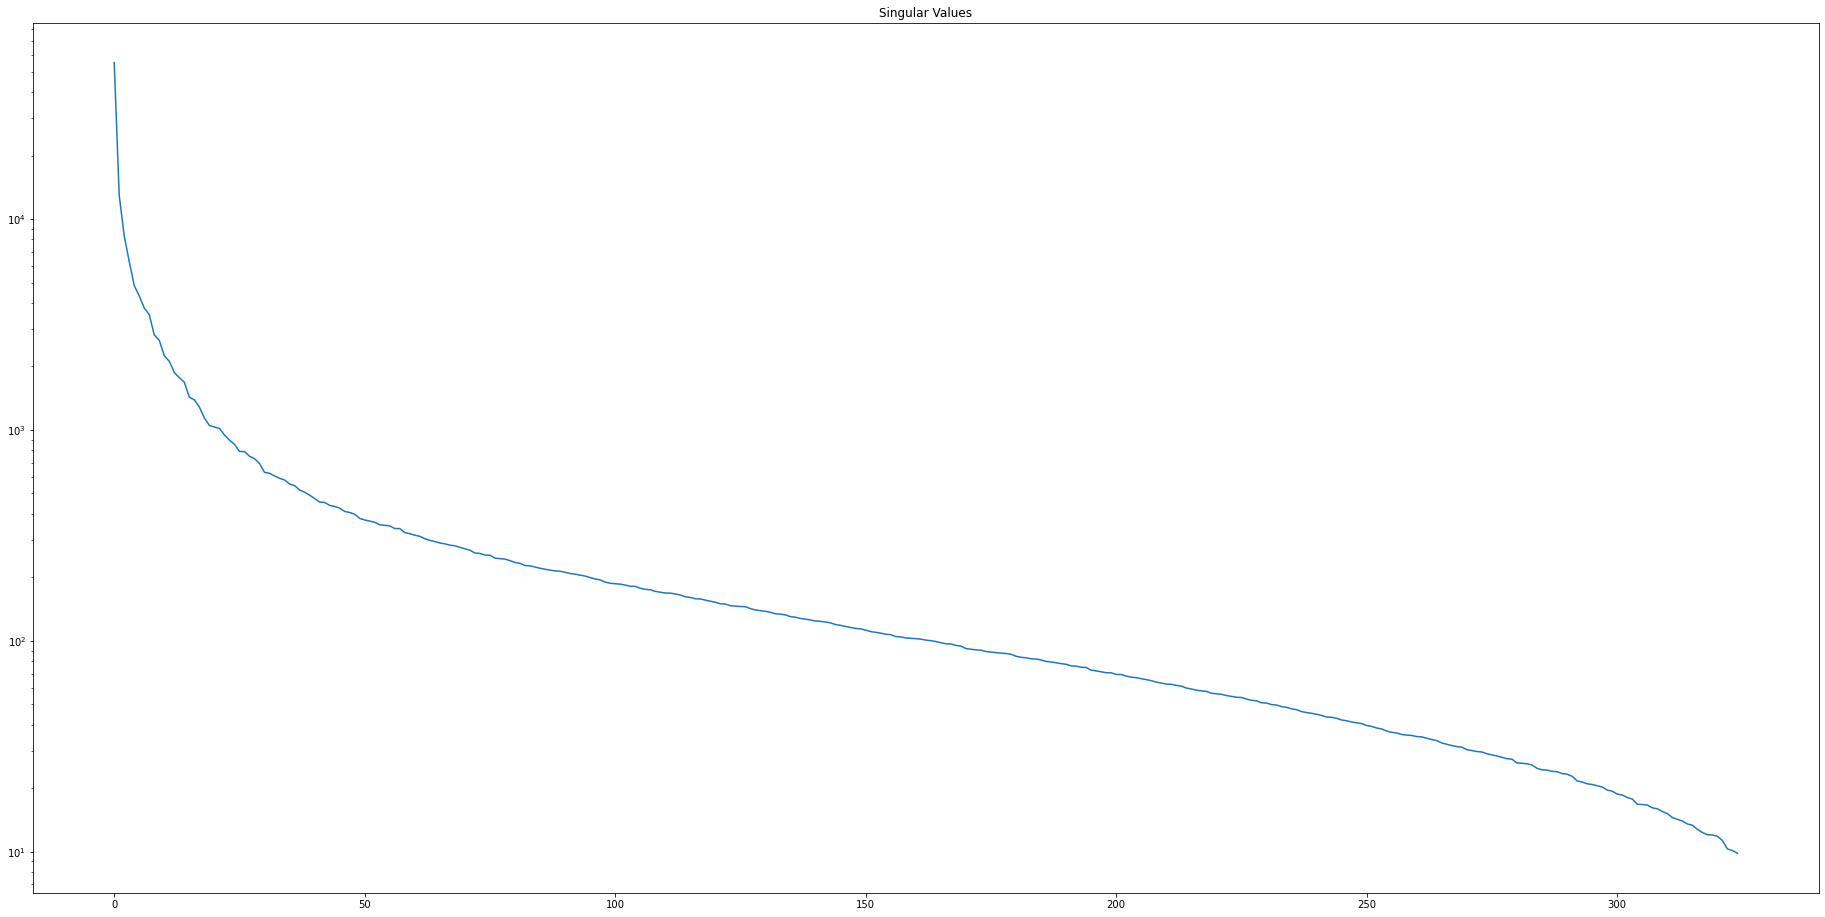

In [40]:
plt.figure(1)
plt.semilogy(np.diag(S1))
plt.title('Singular Values')
plt.show()

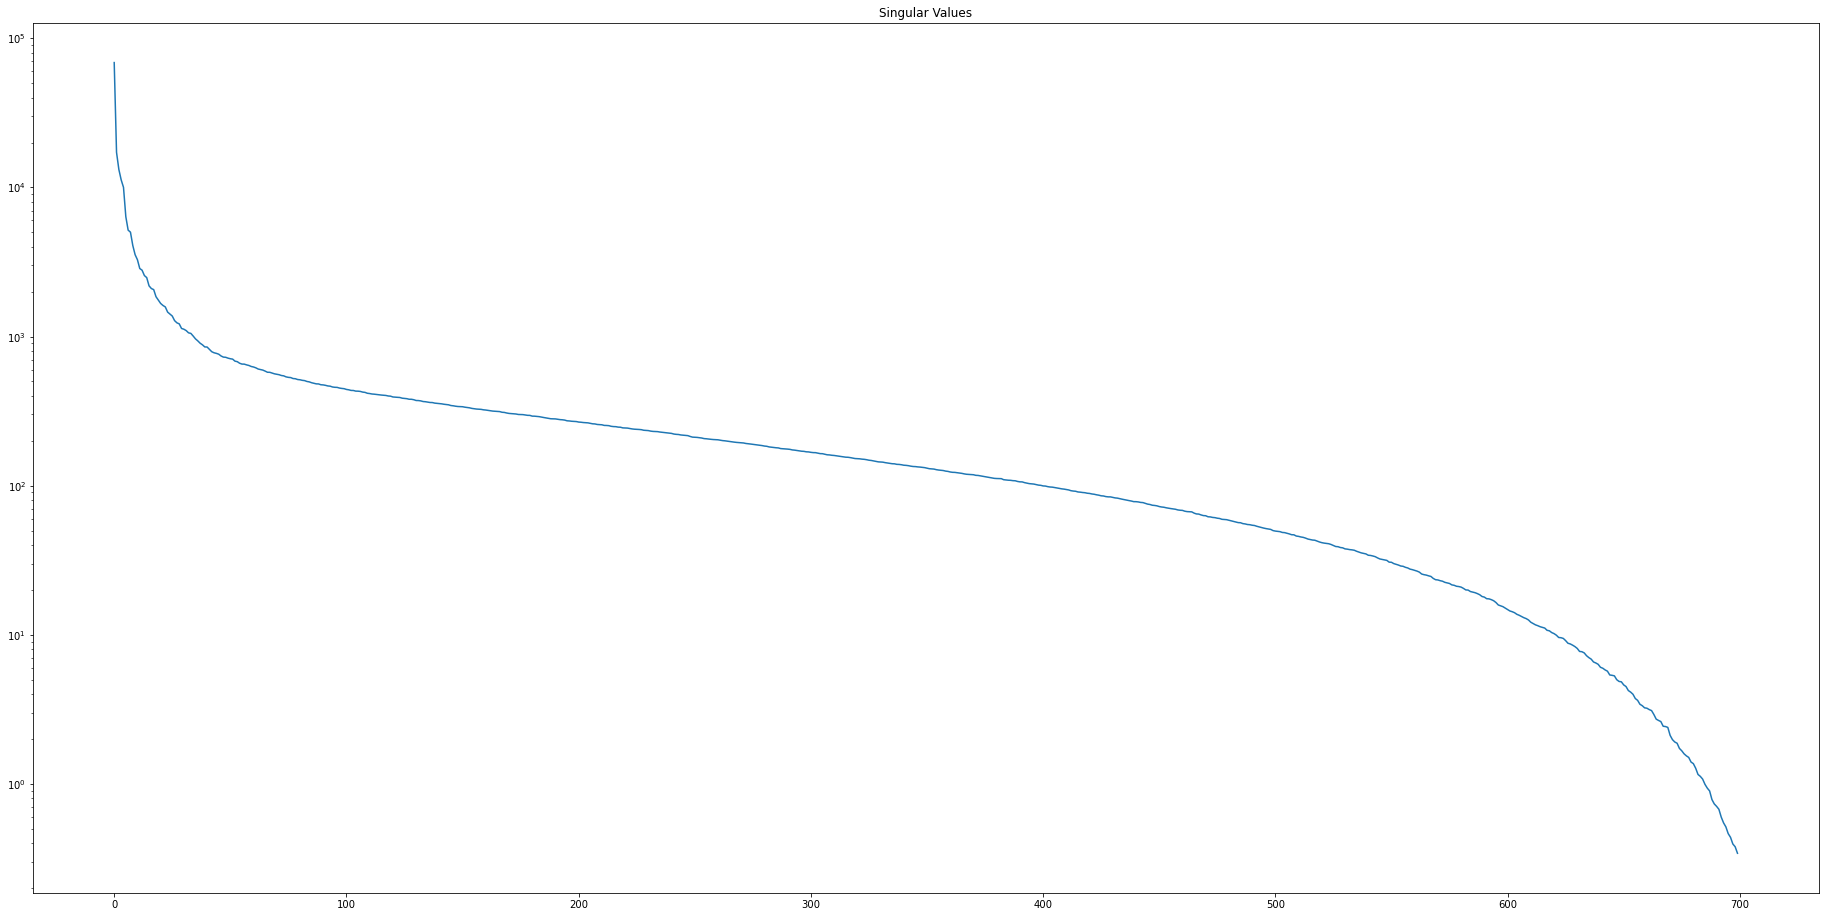

In [41]:
plt.figure(2)
plt.semilogy(np.diag(S2))
plt.title('Singular Values')
plt.show()

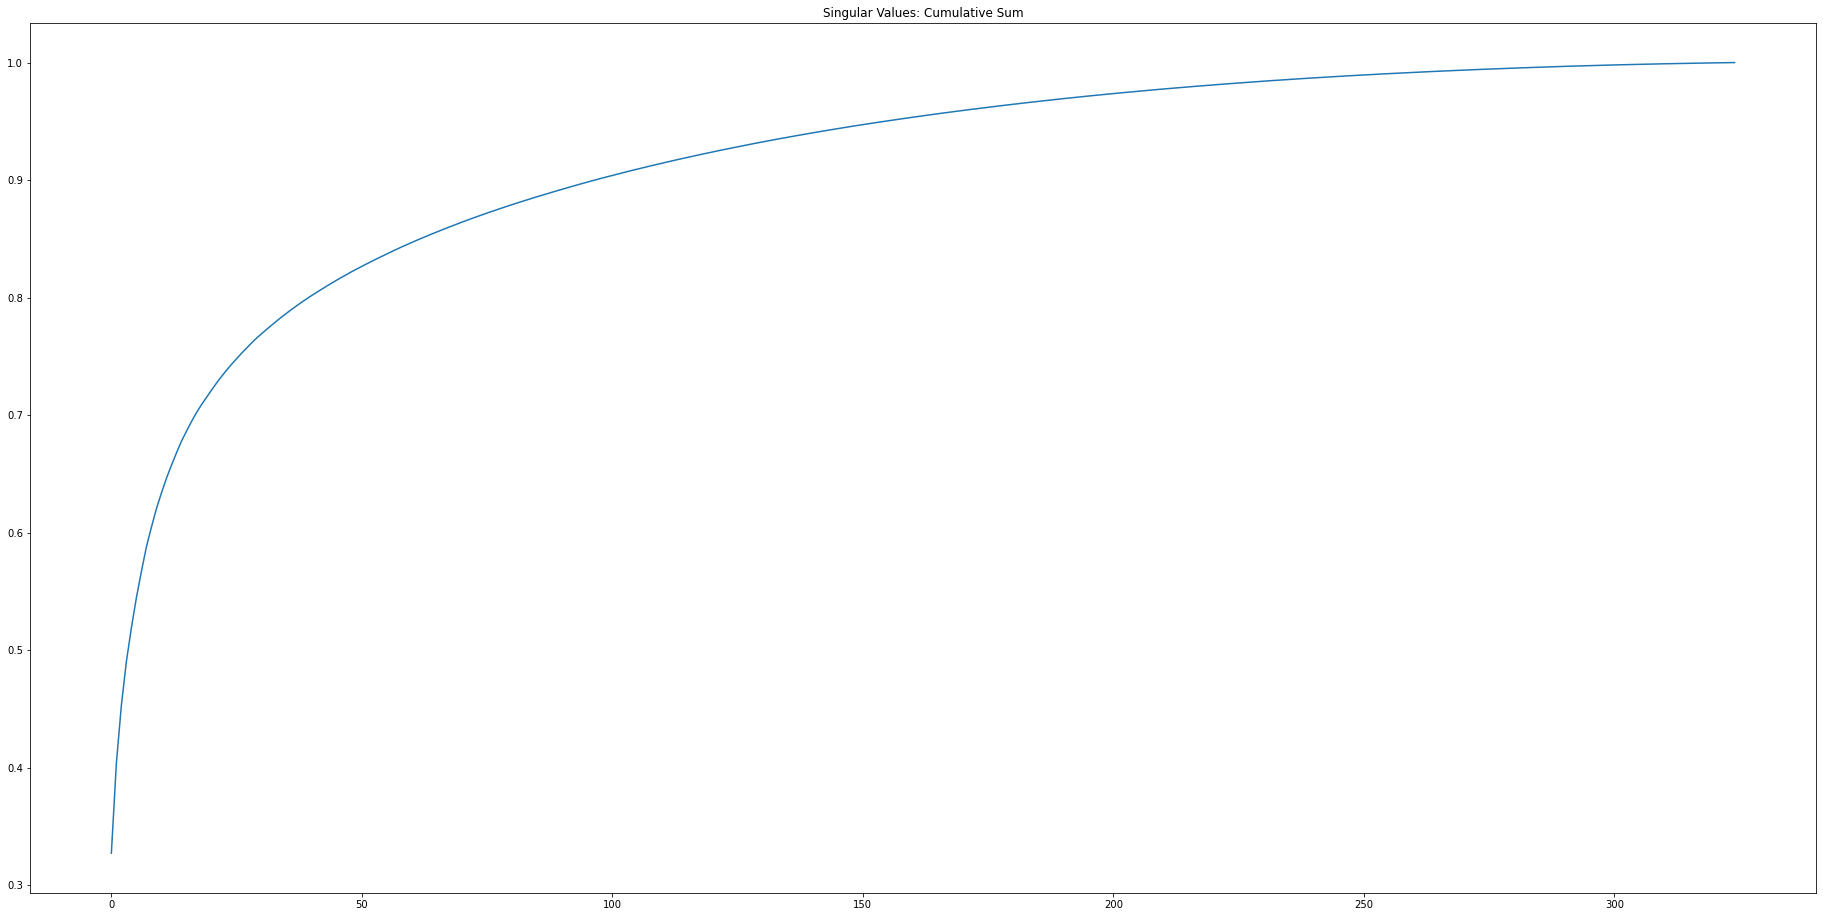

In [42]:
plt.figure(3)
plt.plot(np.cumsum(np.diag(S1))/np.sum(np.diag(S1)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

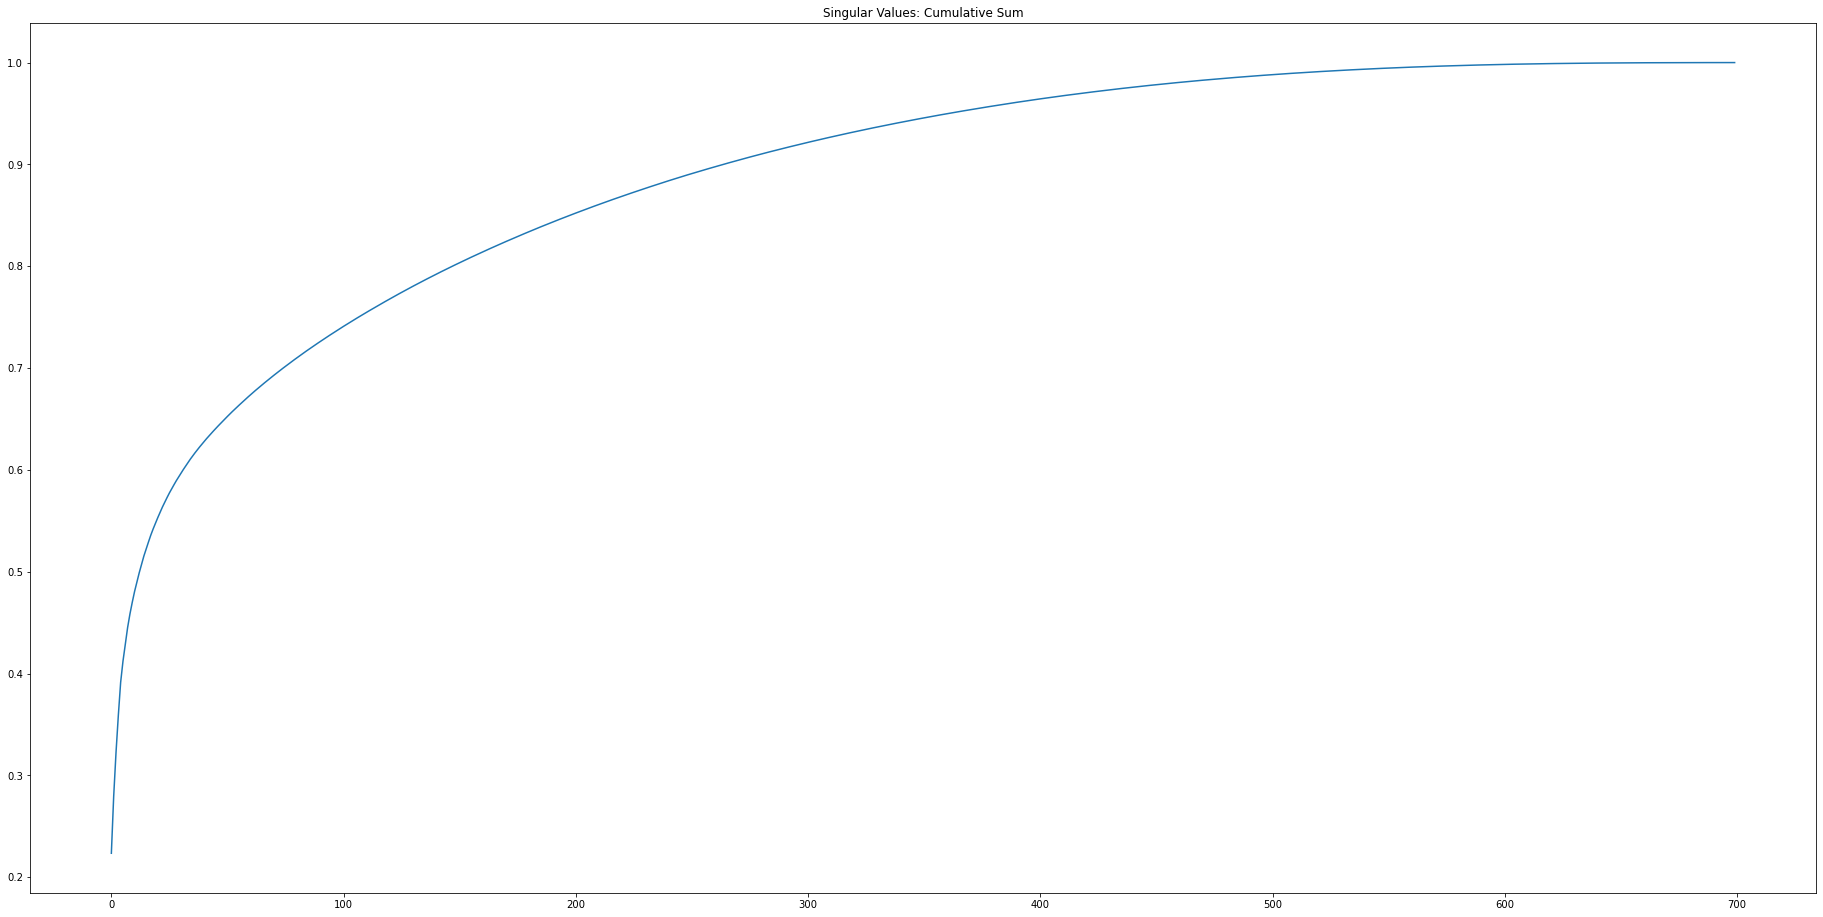

In [43]:
plt.figure(4)
plt.plot(np.cumsum(np.diag(S2))/np.sum(np.diag(S2)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

SVD for real-valued matrices


A = U . Sigma . V^T

Where A is the real m x n matrix that we wish to decompose, U is an m x m matrix, Sigma (often represented by the uppercase Greek letter Sigma) is an m x n diagonal matrix, and V^T is the  transpose of an n x n matrix where T is a superscript.

The diagonal values in the Sigma matrix are known as the singular values of the original matrix A. The columns of the U matrix are called the left-singular vectors of A, and the columns of V are called the right-singular vectors of A.

Calculate Singular-Value Decomposition

The SVD can be calculated by calling the svd() function.

The function takes a matrix and returns the U, Sigma and V^T elements. The Sigma diagonal matrix is returned as a vector of singular values. The V matrix is returned in a transposed form, e.g. V.T.

The example below defines a 3×2 matrix and calculates the Singular-value decomposition

In [ ]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


#  Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

    Experiment with the SVD method on your own data.
    Research and list 10 applications of SVD in machine learning.
    Apply SVD as a data reduction technique on a tabular dataset.

# Further Reading Generate Recommendations

Intuition behind Matrix Factorization

A recommendation engine is a subcategory of machine learning which aims to provide a rating for some user or item. Matrix factorization falls under the category of collaborative filtering in recommendation systems. Intuitively, collaborative filtering aims to identify items that a user A would like based on the interactions of other user(s) which are similar to user A. You can think of this as an optimization problem where we aim to find a method which yields the best ratings for a given product / user.

If you explore any of these extensions, I’d love to know.

# Further reading:  Reconstruct Matrix from SVD

The original matrix can be reconstructed from the U, Sigma, and V^T elements.

The U, s, and V elements returned from the svd() cannot be multiplied directly.

The s vector must be converted into a diagonal matrix using the diag() function. By default, this function will create a square matrix that is n x n, relative to our original matrix. This causes a problem as the size of the matrices do not fit the rules of matrix multiplication, where the number of columns in a matrix must match the number of rows in the subsequent matrix.

After creating the square Sigma diagonal matrix, the sizes of the matrices are relative to the original m x n matrix that we are decomposing, as follows:

U (m x m) . Sigma (n x n) . V^T (n x n)

Where, in fact, we require:

U (m x m) . Sigma (m x n) . V^T (n x n)

We can achieve this by creating a new Sigma matrix of all zero values that is m x n (e.g. more rows) and populate the first n x n part of the matrix with the square diagonal matrix calculated via diag().

In [ ]:
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


Running the example first prints the original matrix, then the matrix reconstructed from the SVD elements.

The above complication with the Sigma diagonal only exists with the case where m and n are not equal. The diagonal matrix can be used directly when reconstructing a square matrix, as follows.

In [ ]:
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd
# define a matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create n x n Sigma matrix
Sigma = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Running the example prints the original 3×3 matrix and the version reconstructed directly from the SVD elements.

# Further reading SVD for Pseudoinverse

The pseudoinverse is the generalization of the matrix inverse for square matrices to rectangular matrices where the number of rows and columns are not equal.

It is also called the the Moore-Penrose Inverse after two independent discoverers of the method or the Generalized Inverse.

The pseudoinverse is denoted as A^+, where A is the matrix that is being inverted and + is a superscript.

The pseudoinverse is calculated using the singular value decomposition of A:

A^+ = V . D^+ . U^T

Or, without the dot notation:

A^+ = VD^+U^T

Where A^+ is the pseudoinverse, D^+ is the pseudoinverse of the diagonal matrix Sigma and U^T is the transpose of U.



We can get U and V from the SVD operation.

A = U . Sigma . V^T

The D^+ can be calculated by creating a diagonal matrix from Sigma, calculating the reciprocal of each non-zero element in Sigma, and taking the transpose if the original matrix was rectangular.

         s11,   0,   0
Sigma = (  0, s22,   0)
           0,   0, s33

       1/s11,     0,     0
D^+ = (    0, 1/s22,     0)
           0,     0, 1/s33

The pseudoinverse provides one way of solving the linear regression equation, specifically when there are more rows than there are columns, which is often the case.

NumPy provides the function pinv() for calculating the pseudoinverse of a rectangular matrix.

The example below defines a 4×2 matrix and calculates the pseudoinverse.

In [ ]:
# Pseudoinverse
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
 [0.1, 0.2],
 [0.3, 0.4],
 [0.5, 0.6],
 [0.7, 0.8]])
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  9.07607323e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


Running the example first prints the defined matrix, and then the calculated pseudoinverse.

We can calculate the pseudoinverse manually via the SVD and compare the results to the pinv() function.

First we must calculate the SVD. Next we must calculate the reciprocal of each value in the s array. Then the s array can be transformed into a diagonal matrix with an added row of zeros to make it rectangular. Finally, we can calculate the pseudoinverse from the elements.

The specific implementation is:


A^+ = V . D^+ . U^V

The full example is listed below.

In [ ]:
# Pseudoinverse via SVD
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
 [0.1, 0.2],
 [0.3, 0.4],
 [0.5, 0.6],
 [0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = VT.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  9.07607323e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


Running the example first prints the defined rectangular matrix and the pseudoinverse that matches the above results from the pinv() function.

SVD for Dimensionality Reduction

A popular application of SVD is for dimensionality reduction.

Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem.

The result is a matrix with a lower rank that is said to approximate the original matrix.

To do this we can perform an SVD operation on the original data and select the top k largest singular values in Sigma. These columns can be selected from Sigma and the rows selected from V^T.

An approximate B of the original vector A can then be reconstructed.
B = U . Sigmak . V^Tk

In natural language processing, this approach can be used on matrices of word occurrences or word frequencies in documents and is called Latent Semantic Analysis or Latent Semantic Indexing.

In practice, we can retain and work with a descriptive subset of the data called T. This is a dense summary of the matrix or a projection.
T = U . Sigmak

Further, this transform can be calculated and applied to the original matrix A as well as other similar matrices.
T = V^k . A

The example below demonstrates data reduction with the SVD.

First a 3×10 matrix is defined, with more columns than rows. The SVD is calculated and only the first two features are selected. The elements are recombined to give an accurate reproduction of the original matrix. Finally the transform is calculated two different ways.

In [ ]:
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([
 [1,2,3,4,5,6,7,8,9,10],
 [11,12,13,14,15,16,17,18,19,20],
 [21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747  -6.47697214]
 [-49.81310011  -1.91182038]
 [-81.10462276   2.65333138]]
[[-18.52157747  -6.47697214]
 [-49.81310011  -1.91182038]
 [-81.10462276   2.65333138]]


Running the example first prints the defined matrix then the reconstructed approximation, followed by two equivalent transforms of the original matrix.

The scikit-learn provides a TruncatedSVD class that implements this capability directly.

The TruncatedSVD class can be created in which you must specify the number of desirable features or components to select, e.g. 2. Once created, you can fit the transform (e.g. calculate V^Tk) by calling the fit() function, then apply it to the original matrix by calling the transform() function. The result is the transform of A called T above.

The example below demonstrates the TruncatedSVD class.

In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A = array([
 [1,2,3,4,5,6,7,8,9,10],
 [11,12,13,14,15,16,17,18,19,20],
 [21,22,23,24,25,26,27,28,29,30]])
print(A)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


Running the example first prints the defined matrix, followed by the transformed version of the matrix.

We can see that the values match those calculated manually above, except for the sign on some values. We can expect there to be some instability when it comes to the sign given the nature of the calculations involved and the differences in the underlying libraries and methods used. This instability of sign should not be a problem in practice as long as the transform is trained for reuse.

# Conclusion

In this last part, you discovered the Singular-value decomposition method for decomposing a matrix into its constituent elements.

Specifically, you learned:

    What Singular-value decomposition is and what is involved.
    How to calculate an SVD and reconstruct a rectangular and square matrix from SVD elements.
    How to calculate the pseudoinverse and perform dimensionality reduction using the SVD.

